<h1>THIS PART SHOULD BE RUN IN GOOGLE COLAB ENVIRONMENT</h1>

<h3>NOTE: Please skip this part if you have no issues with default packages/dependencies while you are importing the necessary libraries for this project</h3>

In [ ]:
"""
# Checking what type of GPU card is assigned for the current session

!nvidia-smi
"""

In [ ]:
"""
# Gets the RAPIDS-Colab install files and then test-check your GPU;
# Run this and then next cell only;
# Please read the output of this cell.  If your Colab Instance is not RAPIDS
# compatible, it will warn you and give you remediation steps

!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py
"""

In [ ]:
"""
# This will update the Colab environment and restart the kernel; 
# Don't run the next cell until you see the session crash

!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)
"""

In [ ]:
"""
# This will install CondaColab;
# Also, it will restart your kernel one last time;  
# Run this cell by itself and only run the next cell once you see the session
# crash

import condacolab
condacolab.install()
"""

In [ ]:
"""
# Run the rest of the cells as normal

import condacolab
condacolab.check()
"""

In [ ]:
"""
# Installing RAPIDS;
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding
# any other words will default to stable;
# The <packages> option are default blank or 'core'.  By default, we install
# RAPIDSAI and BlazingSQL.  The 'core' option will install only RAPIDSAI and
# not include BlazingSQL

!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'
"""

In [ ]:
"""
# Unistall sci-kit-learn in case to install a new version

!pip uninstall scikit-learn -y
"""

In [ ]:
"""
# Installing the newest (1.0) version of scikit-learn

!pip install -U scikit-learn
"""

In [ ]:
"""
!pip install sklearn
"""

In [ ]:
"""
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
"""

In [ ]:
"""
# Installing "imblearn" package

!pip install imblearn
"""

<h1>IMPORTING LIBRARIES/PACKAGES</h1>

In [ ]:
# Runs this sell if you have issues with "safe_indexing"

try:
    # See #1137: this allows compatibility for scikit-learn >= 0.24
    from sklearn.utils import safe_indexing
except ImportError:
    from sklearn.utils import _safe_indexing

In [ ]:
# libraries and utiliies
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from imblearn.over_sampling import SMOTE
import imblearn 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import statistics

from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn import metrics

import joblib

In [ ]:
"""
# To load a file from Google Drive

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
"""

"\n# importing file\nfrom google.colab import drive\ndrive.mount('/gdrive')\n%cd /gdrive\n"

In [ ]:
# Loading dataset

copied_path = "/content/drive/MyDrive/Projects/Project_1/data/raw/BankChurners.csv"
df = pd.read_csv(copied_path)

In [ ]:
df.head(3)

CLIENTNUM  ... Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0  768805383  ...                                            0.99991                                                                                
1  818770008  ...                                            0.99994                                                                                
2  713982108  ...                                            0.99998                                                                                

[3 rows x 23 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

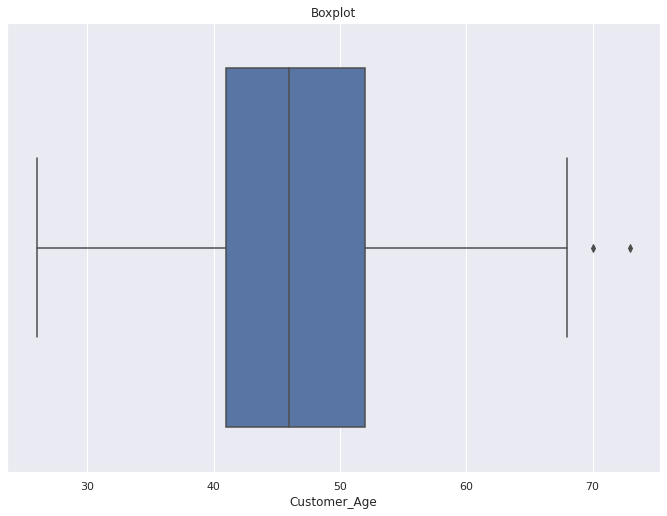

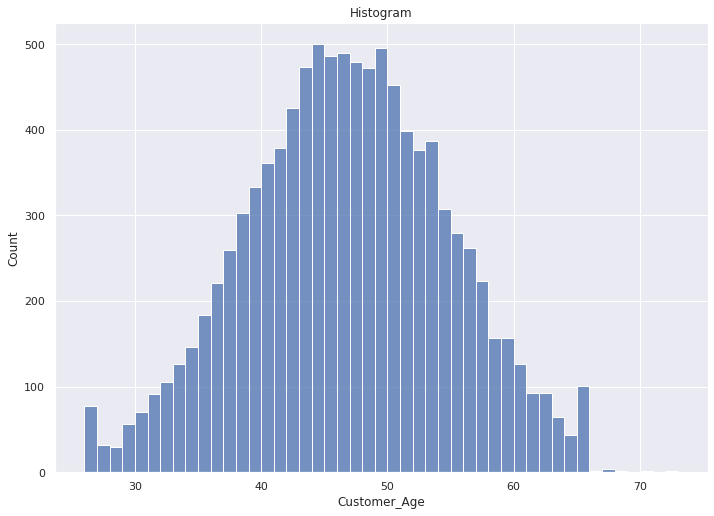

In [ ]:
# Graphing the distribution of the age

def boxPol_histPlot(data_list, box_plot=True, hist_plot=True):
  for i in data_list:
    if box_plot:
      _ = sns.boxplot(x=df[i]).set_title("Boxplot")
      plt.show()
    if hist_plot:
      _ = sns.histplot(data=df, x=i).set_title("Histogram")
      plt.show()

boxPol_histPlot(['Customer_Age'])

In [ ]:
# Destribution of gender and type of cards

df["Card_Category"].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

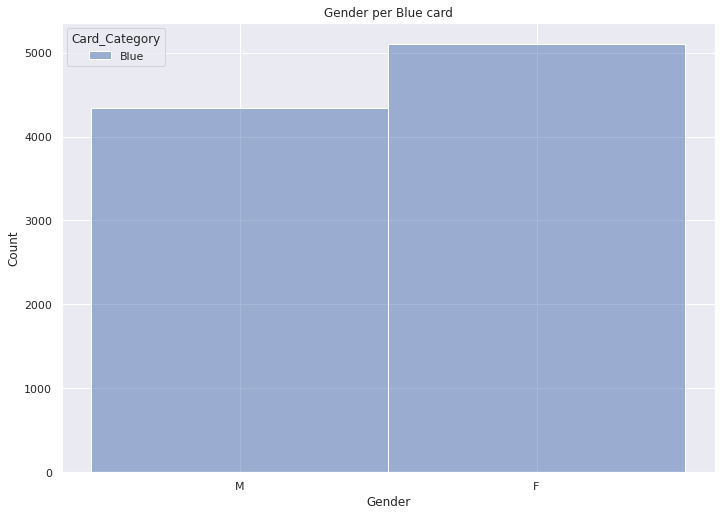

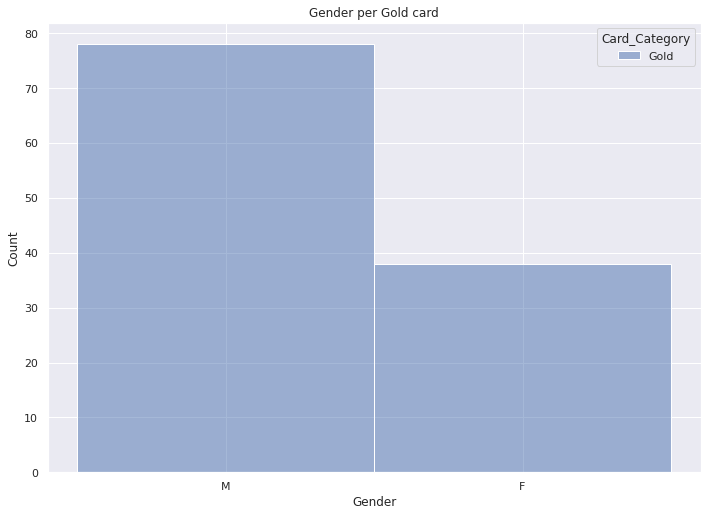

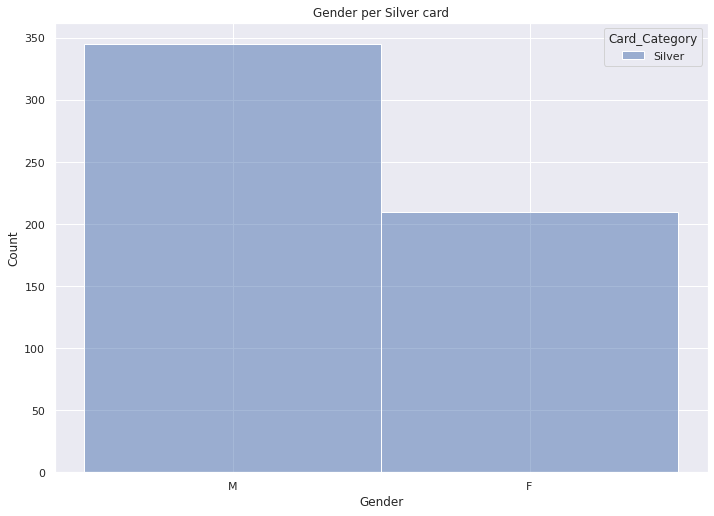

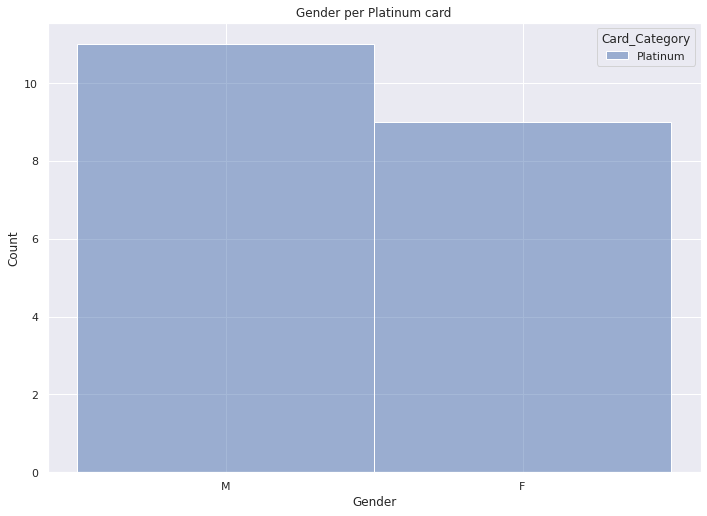

In [ ]:
# Destribution

def show_gender_by_card_destribution():
  list_of_card = df["Card_Category"].unique()
  for card_type in list_of_card:
    _ = sns.histplot(data=df[df['Card_Category'] == card_type], x='Gender',
                    hue="Card_Category").set_title(f'Gender per {card_type} card')
    plt.show()

show_gender_by_card_destribution()

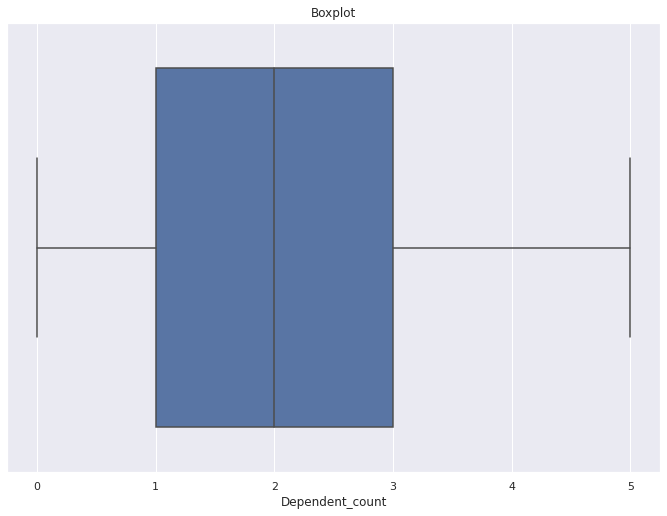

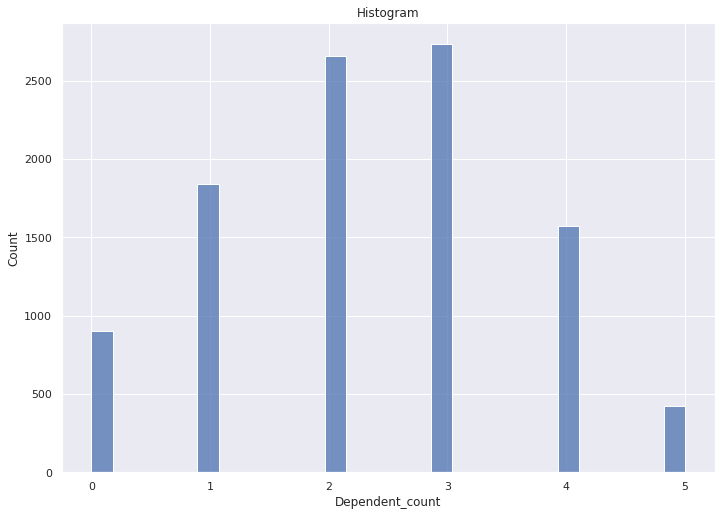

In [ ]:
# Destribution of "Dependent_count" column

boxPol_histPlot(['Dependent_count'])

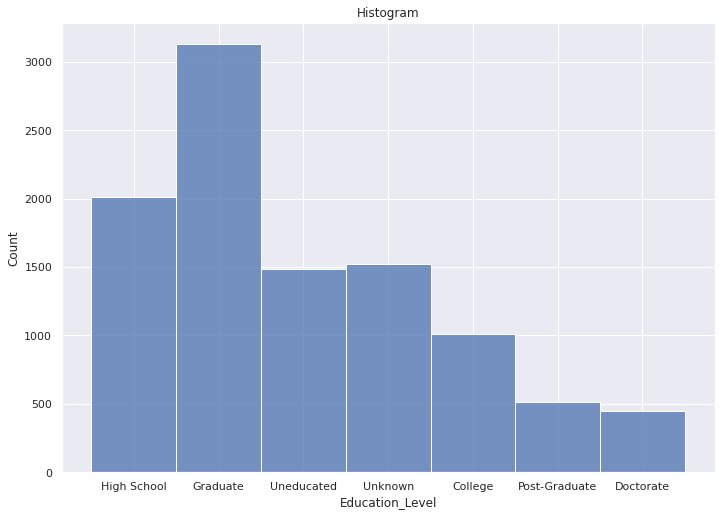

In [ ]:
# Proportion of "Education_Level" column

boxPol_histPlot(['Education_Level'], box_plot=False)

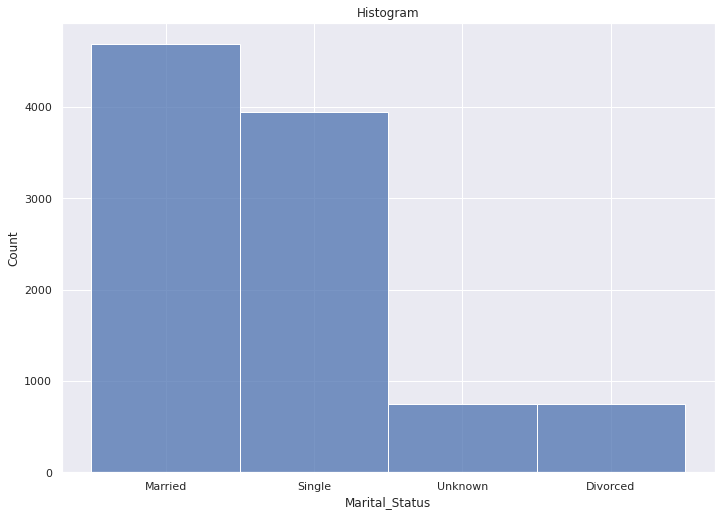

In [ ]:
# Checking "Marital_Status" column

boxPol_histPlot(['Marital_Status'], box_plot=False)

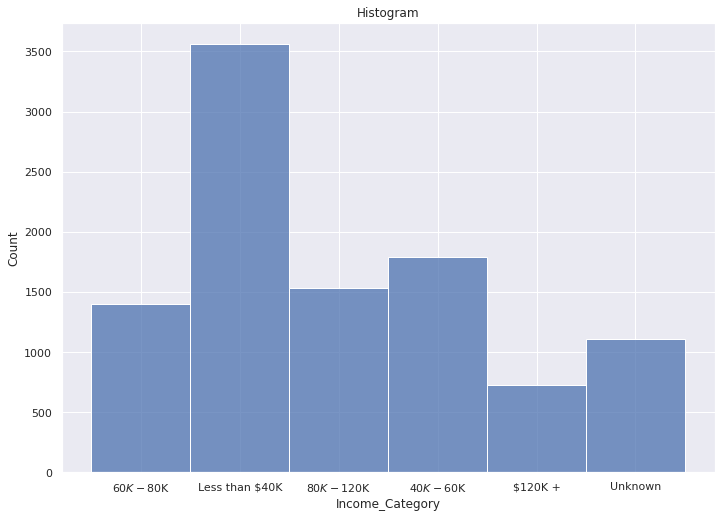

In [ ]:
# Proportion of "Income_Category"

boxPol_histPlot(['Income_Category'], box_plot=False)

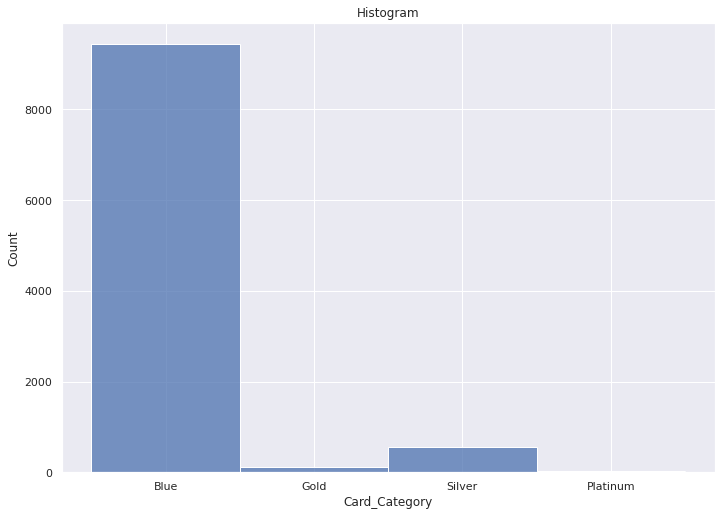

In [ ]:
# Proportion of "Card_Category"

boxPol_histPlot(['Card_Category'], box_plot=False)

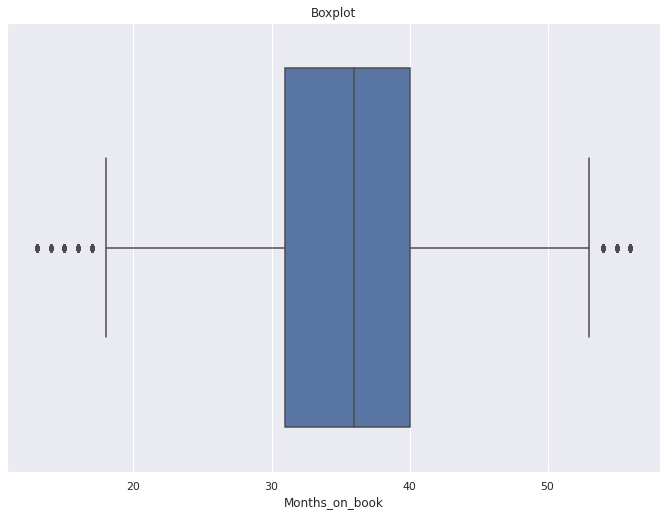

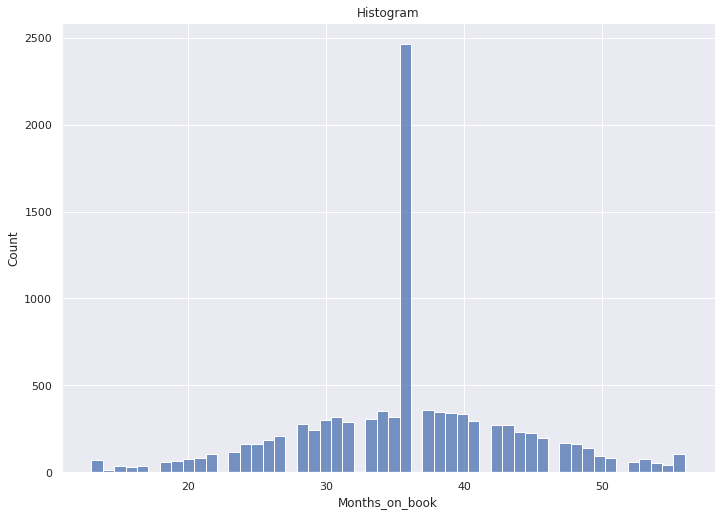

In [ ]:
# Distribution of months the customer stays the part of the bank

boxPol_histPlot(['Months_on_book'])

In [ ]:
# Checking the "kurtosis" of "Months_on_book"

print(f"Kurtosis for 'Months_on_book': \
 {round(df['Months_on_book'].kurt(), 2)}. In other words, data is not normally\
 distributed.")

Kurtosis for 'Months_on_book':  0.4. In other words, data is not normally distributed.


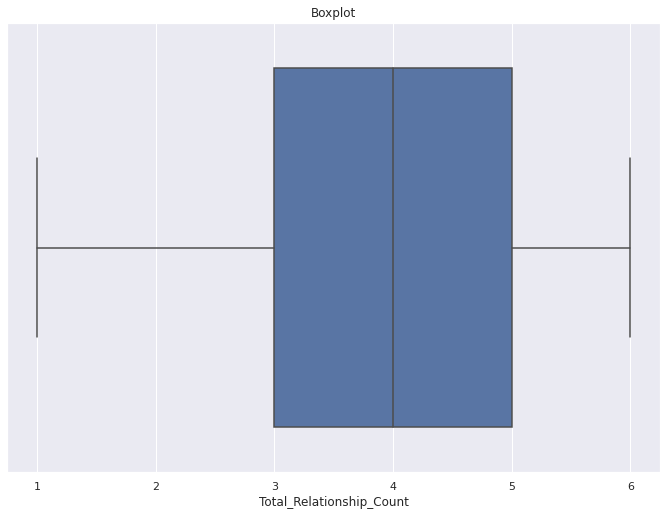

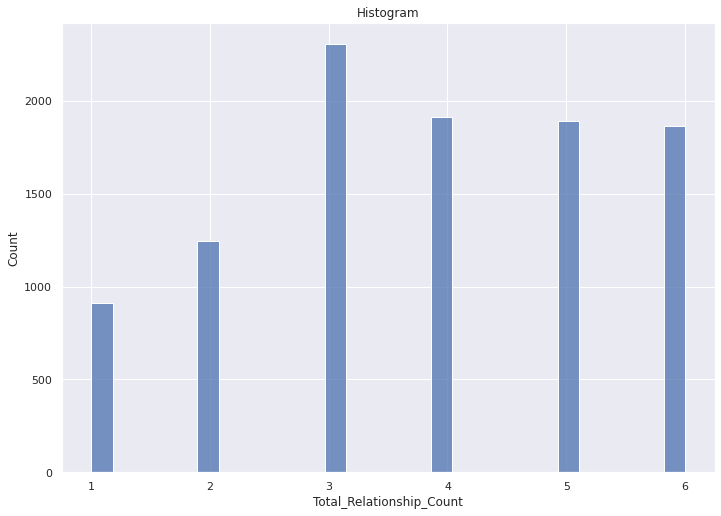

In [ ]:
# Distribution of the total number of goods that were obtained by the customer

boxPol_histPlot(['Total_Relationship_Count'])

<h3>Note: this column is very close to uniform distribution that could 
be useless for model estimation</h3>

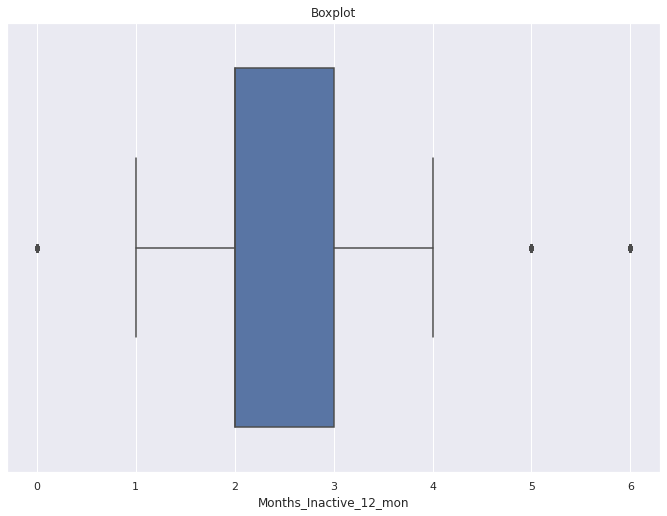

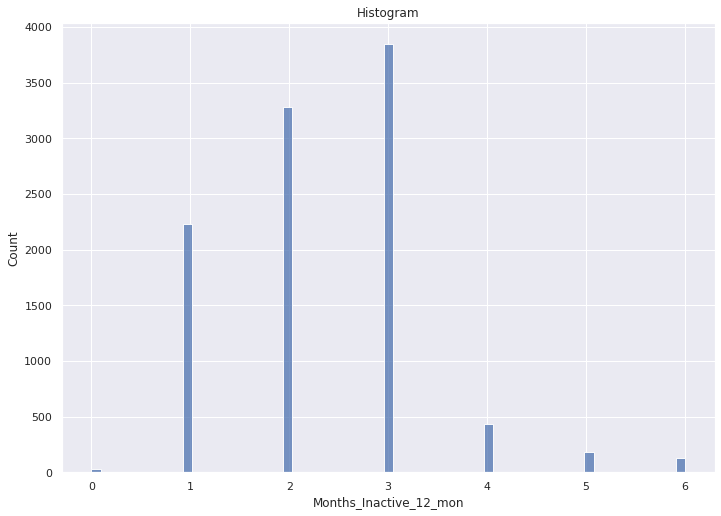

In [ ]:
# Distribution of the number of months inactive in the last 12 months

boxPol_histPlot(['Months_Inactive_12_mon'])

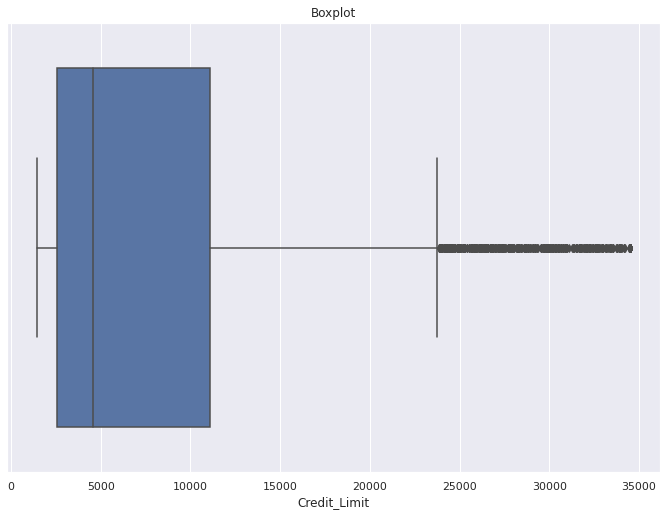

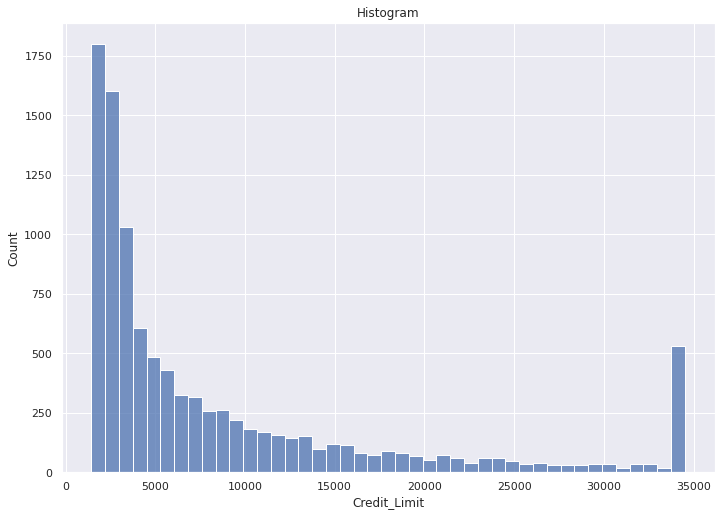

In [ ]:
# Distribution of the Credit limit

boxPol_histPlot(['Credit_Limit'])

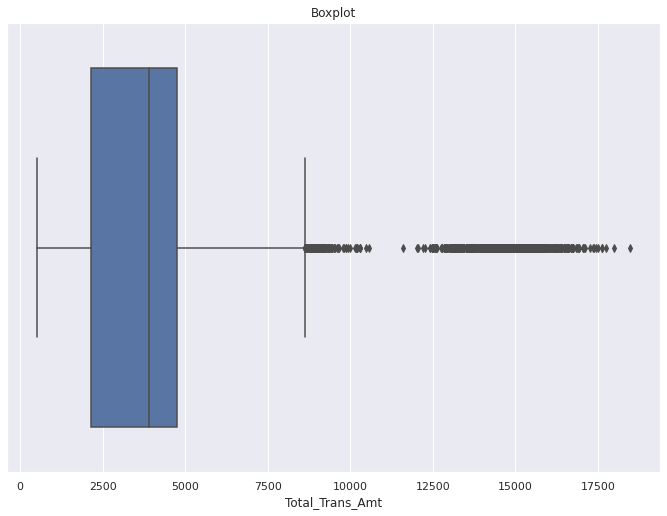

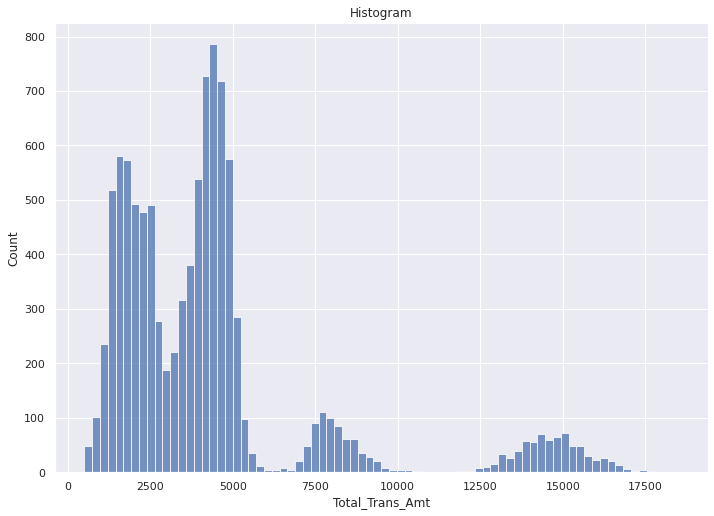

In [ ]:
# Distribution of the total transaction amount (within prior 12 months)

boxPol_histPlot(['Total_Trans_Amt'])

<h3>NOTE: we can see the distribution of this column is multimodal. So, we can some techniques to split this into multiple groups (using PCA)</h3>

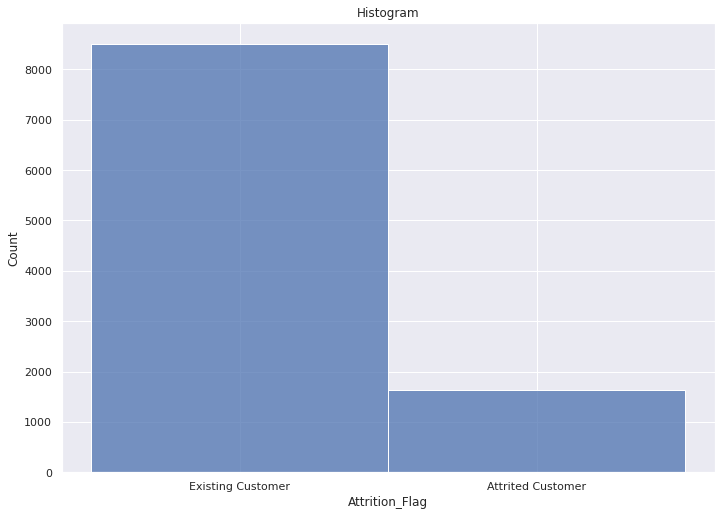

In [ ]:
# Ration of churn vs not churn customers

df['Attrition_Flag'].unique()
boxPol_histPlot(['Attrition_Flag'], box_plot=False)

<h3>NOTE: we have an underrepresented class. So, we
need to use SMOTE technique to balance out these two classes, so our model is 
able to catch mode information about the underrepresented class.</h3>

<h1>DATA PRE-PROCESSING</h1>

In [ ]:
# Mapping target value with two integers (0, 1)

df['Attrition_Flag'] = df['Attrition_Flag'].map(
                        lambda x: 1 if x == "Attrited Customer" else 0)
df['Attrition_Flag'].unique(), df['Attrition_Flag'].dtype

(array([0, 1]), dtype('int64'))

In [ ]:
# Mapping "Gender" column with values 1 and 0

df['Gender'] = df['Gender'].map(lambda x: 1 if x == "F" else 0)
df['Gender'].unique(), df['Gender'].dtype

(array([0, 1]), dtype('int64'))

In [ ]:
# Creating dummies for the "Education_Level" column

df = pd.concat([df, pd.get_dummies(
    df['Education_Level']).drop(['Unknown'], axis=1)], axis=1)
df.head(2)

CLIENTNUM  Attrition_Flag  ...  Post-Graduate  Uneducated
0  768805383               0  ...              0           0
1  818770008               0  ...              0           0

[2 rows x 29 columns]

In [ ]:
# Creating dummies for the "Income_Category" column

df = pd.concat([df, pd.get_dummies(
    df['Income_Category']).drop(['Unknown'], axis=1)], axis=1)
df.head(3)

CLIENTNUM  Attrition_Flag  ...  $80K - $120K  Less than $40K
0  768805383               0  ...             0               0
1  818770008               0  ...             0               1
2  713982108               0  ...             1               0

[3 rows x 34 columns]

In [ ]:
# Creating dummies for the "Marital_Status" column

df = pd.concat(
    [df, pd.get_dummies(df['Marital_Status']).drop(['Unknown'], axis=1)],
    axis=1)
df.head(3)

CLIENTNUM  Attrition_Flag  Customer_Age  ...  Divorced  Married Single
0  768805383               0            45  ...         0        1      0
1  818770008               0            49  ...         0        0      1
2  713982108               0            51  ...         0        1      0

[3 rows x 37 columns]

In [ ]:
# Creating dummies or the "Card_Category" column

df = pd.concat(
    [df, pd.get_dummies(df['Card_Category']).drop(['Platinum'], axis=1)],
    axis=1)
df.head(2)

CLIENTNUM  Attrition_Flag  Customer_Age  Gender  ...  Single Blue Gold Silver
0  768805383               0            45       0  ...       0    1    0      0
1  818770008               0            49       1  ...       1    1    0      0

[2 rows x 40 columns]

In [ ]:
# Dopping categorical columns (because we already made dummies for them)

df = df.drop(['Education_Level', 'Income_Category', 'Marital_Status',
              'Card_Category', 'CLIENTNUM', "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
              "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], axis=1)
df.head(2)

Attrition_Flag  Customer_Age  Gender  ...  Blue  Gold  Silver
0               0            45       0  ...     1     0       0
1               0            49       1  ...     1     0       0

[2 rows x 33 columns]

In [ ]:
# Normolizing data (this step is not necessary for some classification models)

def normolizing_data(data):
  x = data.values
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x)
  df_normolized = pd.DataFrame(x_scaled, columns=data.columns)
  print(df_normolized.head(3))
  return df_normolized

df_normolized = normolizing_data(df)

   Attrition_Flag  Customer_Age  Gender  ...  Blue  Gold  Silver
0             0.0      0.404255     0.0  ...   1.0   0.0     0.0
1             0.0      0.489362     1.0  ...   1.0   0.0     0.0
2             0.0      0.531915     0.0  ...   1.0   0.0     0.0

[3 rows x 33 columns]


In [ ]:
# Function to see the correlation

def data_correlation(data):
  sns.set(rc={'figure.figsize':(33.7,10.27)})
  _ = sns.heatmap(data.corr('pearson'), annot=True).set_title('Pearon correlation')
  plt.show()
  _ = sns.heatmap(data.corr('spearman'), annot=True).set_title('Spearman correlation')
  plt.show()  

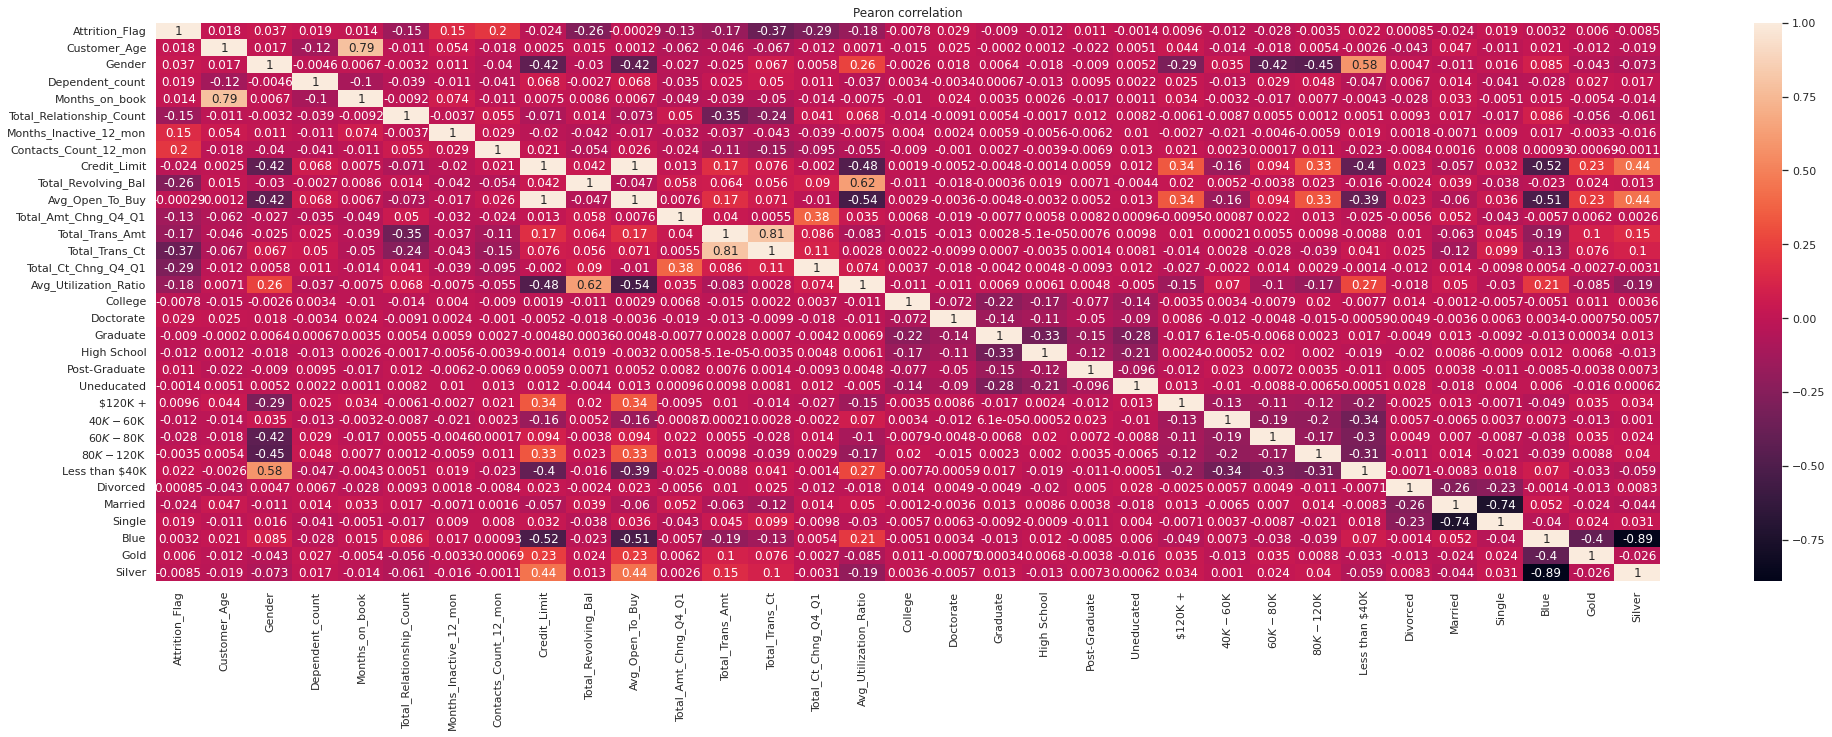

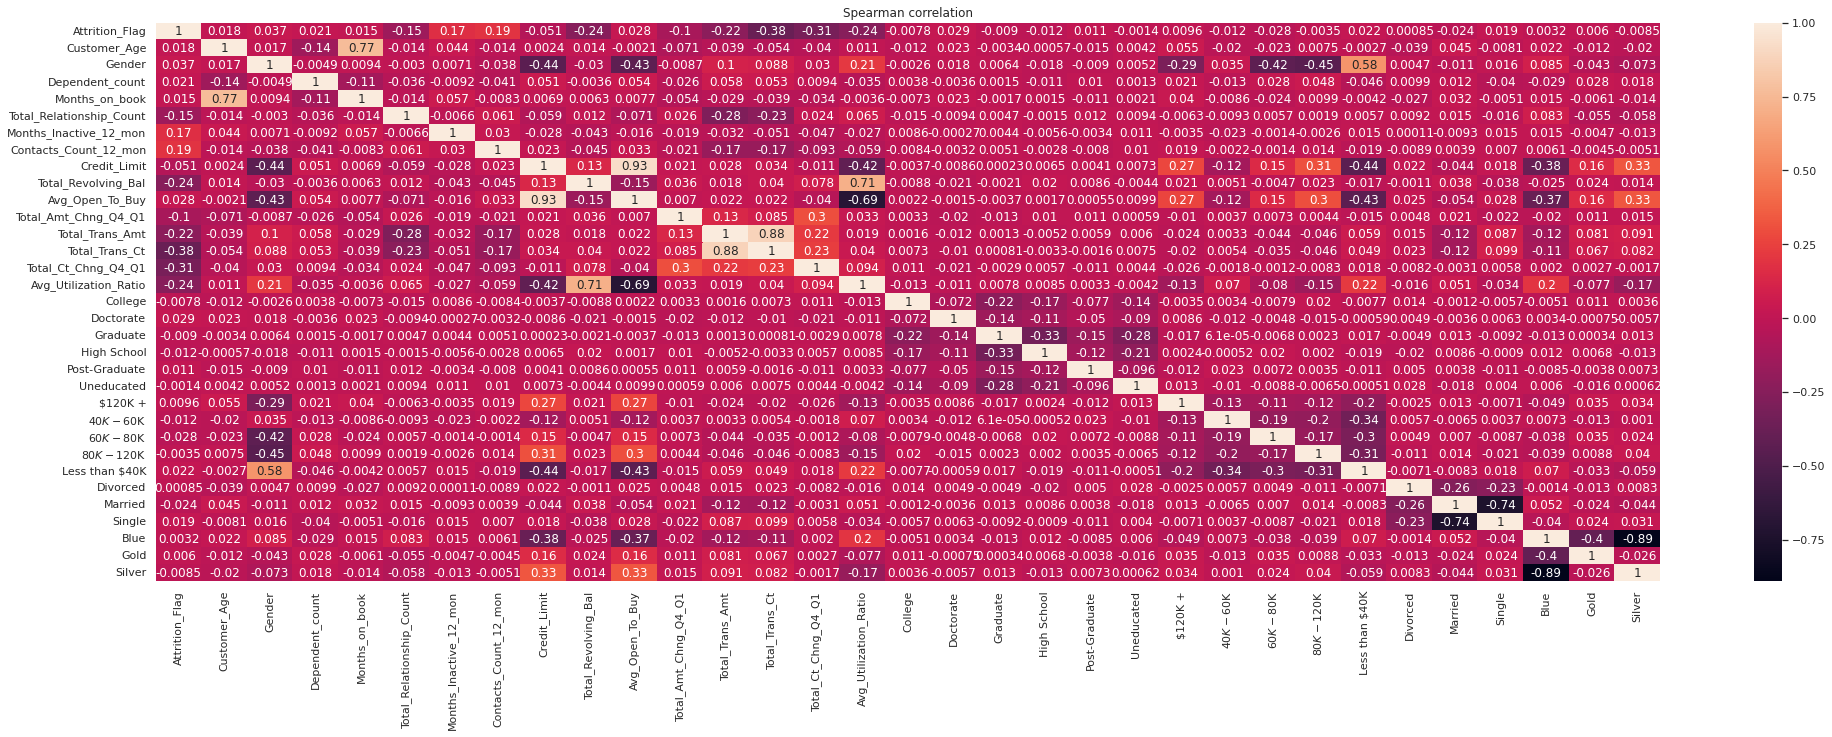

In [ ]:
# See the correlation for normalized data

data_correlation(df_normolized)

In [ ]:
# Reseting index

def df_reset_index(data):
  return data.reset_index(drop=True)

In [ ]:
# Splitting data

X_train, X_test = train_test_split(df, test_size=0.3, random_state=42)
X_train = df_reset_index(X_train)
X_test = df_reset_index(X_test)
X_train.shape, X_test.shape

((7088, 33), (3039, 33))

In [ ]:
# Checking the balance of classes for the Train set

X_train[X_train['Attrition_Flag'] == 0].shape, X_train[X_train['Attrition_Flag'] == 1].shape

((5957, 33), (1131, 33))

In [ ]:
# Checking the balance of classes for the Testing set

X_test[X_test['Attrition_Flag'] == 0].shape, X_test[X_test['Attrition_Flag'] == 1].shape

((2543, 33), (496, 33))

In [ ]:
# Data upsampling using SMOTE
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

def oversampling_data(data):
  oversample = SMOTE()
  X, y = oversample.fit_resample(
      data[data.columns[1:]], data[data.columns[0]])
  print(f"Independent feature(s): {X.shape}\n Dependent feature: {y.shape}")
  return X, y

X, y = oversampling_data(X_train)

Independent feature(s): (11914, 32)
 Dependent feature: (11914,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


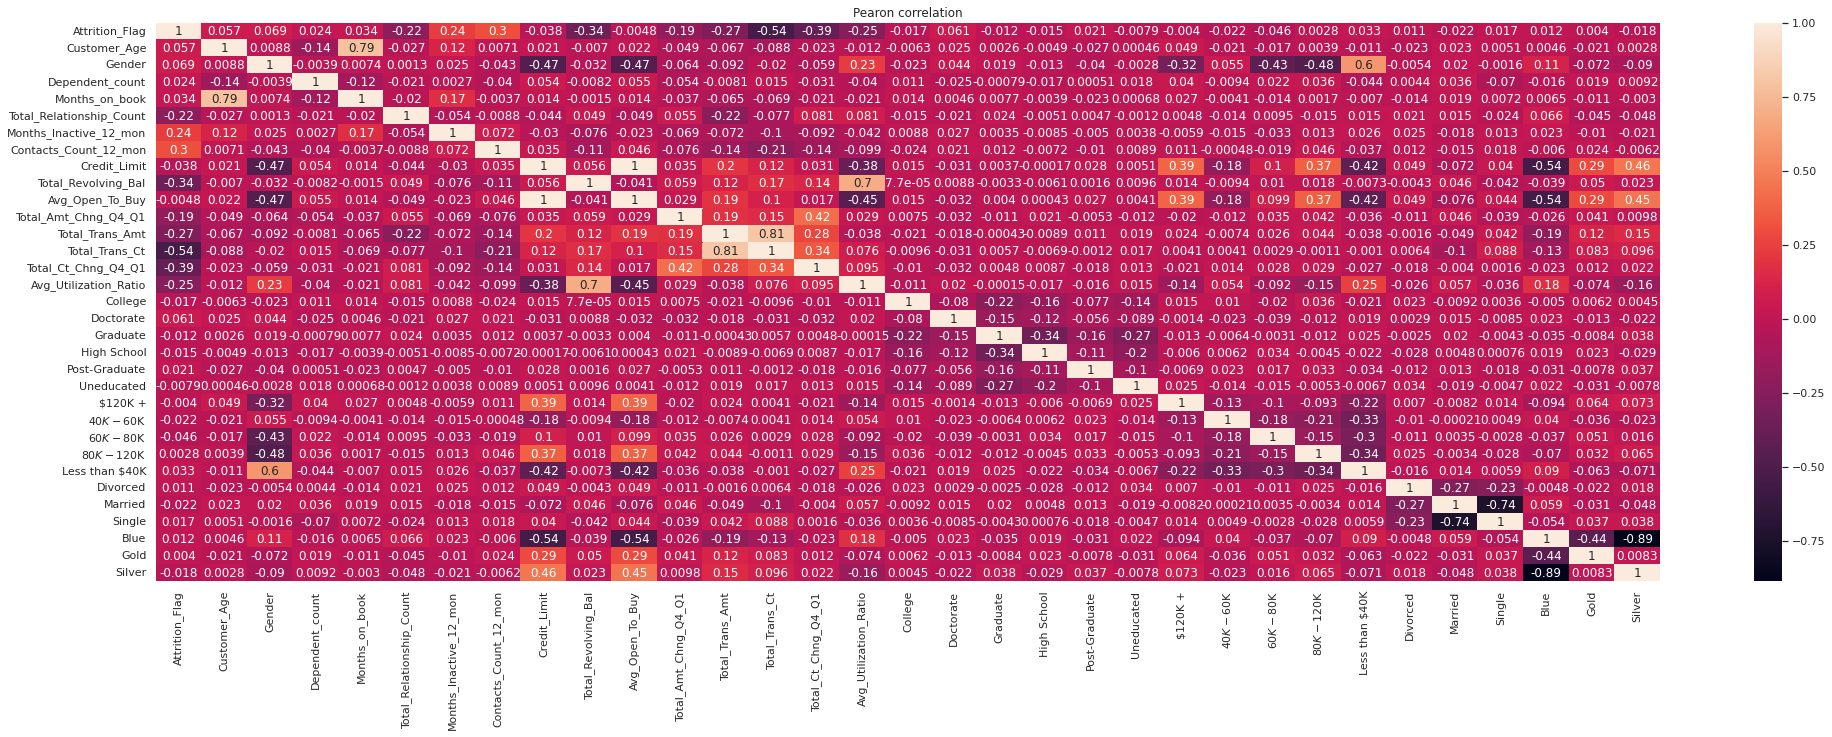

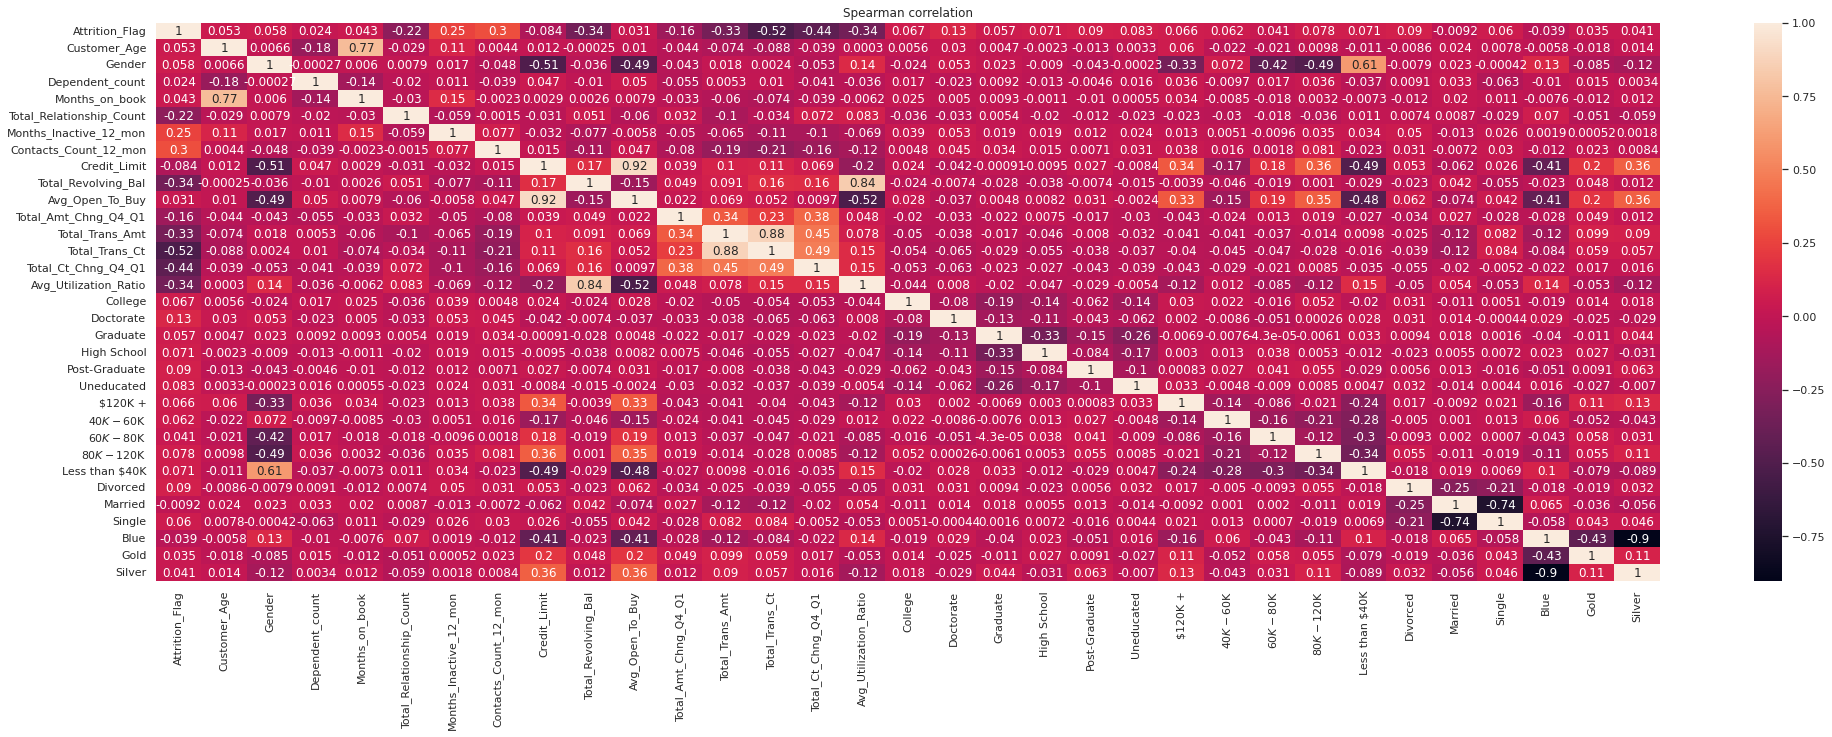

In [ ]:
# Taking a closer look at balanced data using correlation approach

part_1 = pd.DataFrame(data=y).rename(columns={0: "Attrition_Flag"})
part_2 = pd.DataFrame(data=X, columns=df.columns[1:])
part_3 = pd.concat([part_1, part_2], axis=1)

data_correlation(part_3)

In [ ]:
# Preparing dataset for PCA reduction;
# Choosing the columns where we are going to apply PCA

ohe_data = part_3[part_3.columns[16:]]
ohe_data.columns

Index(['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
       'Uneducated', '$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       'Less than $40K', 'Divorced', 'Married', 'Single', 'Blue', 'Gold',
       'Silver'],
      dtype='object')

In [ ]:
unsampled_df = part_3.drop(columns=part_3.columns[16:])
unsampled_df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<h3><b>PCA of One Hot Encoded Data</b></h3>

In [ ]:
# We will use principal component analysis to reduce the dimensionality of the
# one hot encoded categorical variable, losing some of the variances

def pca_to_data(data, n_components=4, pre_trained_model=None):
  if len(data.columns) <= 4:
    return None, data

  if pre_trained_model:
    pca_model = pre_trained_model
    pc_matrix = pca_model.transform(data)
  else:
    N_COMPONENTS = n_components

    pca_model = PCA(n_components=N_COMPONENTS)
    pc_matrix = pca_model.fit_transform(data)

  print(f"Original data shape: {data.shape}\n"
  f"PCA data shape:{pc_matrix.shape}")

  evr = pca_model.explained_variance_ratio_
  print(f"Explained variance ration: {evr}")

  total_var = evr.sum() * 100
  print(f"Total explained variance ration: {total_var}")

  test = pd.DataFrame(pca_model.components_, columns=data.columns,
                      index=['PC-1', 'PC-2', 'PC-3', 'PC-4'])
  pca_feature_names = []
  for i in range(len(test)):
    value_1 = abs(test.iloc[i, :].min())
    value_2 = abs(test.iloc[i, :].max())
    if value_1 > value_2:
      pca_feature_names.append(
          test.iloc[i, :][test.iloc[i, :] == test.iloc[i, :].min()].index[0])
    else:
      pca_feature_names.append(
          test.iloc[i, :][test.iloc[i, :] == test.iloc[i, :].max()].index[0]) 

  pc_matrix_outcome = pd.DataFrame(pc_matrix, columns=pca_feature_names)

  return pca_model, pc_matrix_outcome

In [ ]:
# Appling the principal component on our dummy features

pca_model_1, pca_matrix_1 = pca_to_data(data=ohe_data, n_components=4)

Original data shape: (11914, 17)
PCA data shape:(11914, 4)
Explained variance ration: [0.20667943 0.14138653 0.12489523 0.08313001]
Total explained variance ration: 55.609119611846424


In [ ]:
# Function to concatenate two data frames

def concat_dataframes(data_1, data_2):
  result = pd.concat([data_1, data_2], axis=1)
  print(result.head(2))
  return result

In [ ]:
# Applying concatenation

unsampled_df_with_pcs = concat_dataframes(unsampled_df, pca_matrix_1)

   Attrition_Flag  Customer_Age  Gender  ...  Less than $40K  Graduate  $40K - $60K
0               0          49.0     0.0  ...       -0.430708 -0.106934     0.146096
1               0          61.0     1.0  ...       -0.308841 -0.536213    -0.215262

[2 rows x 20 columns]


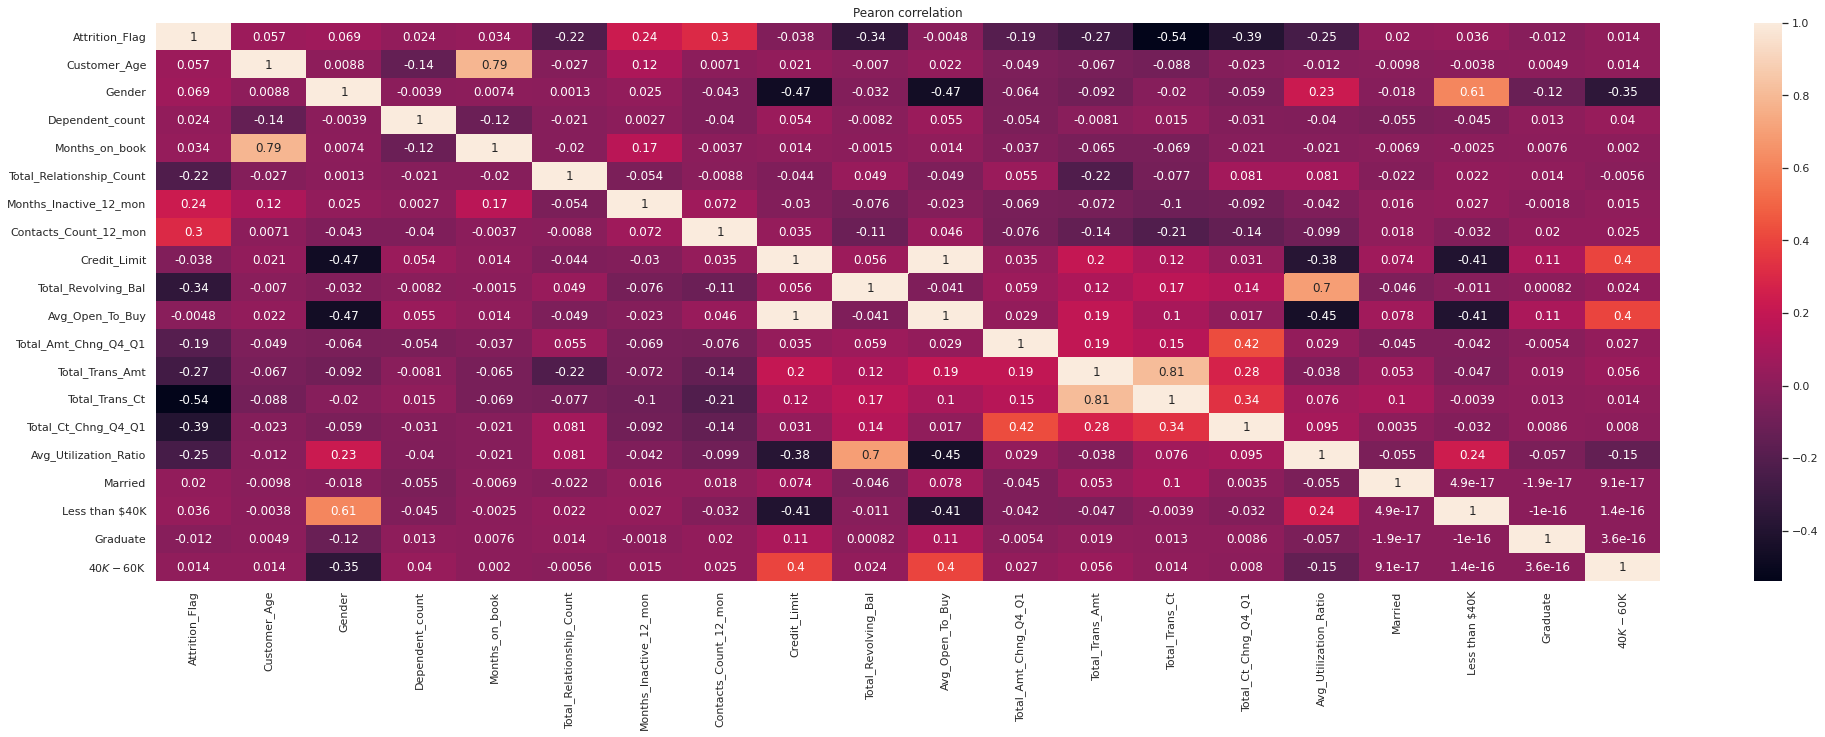

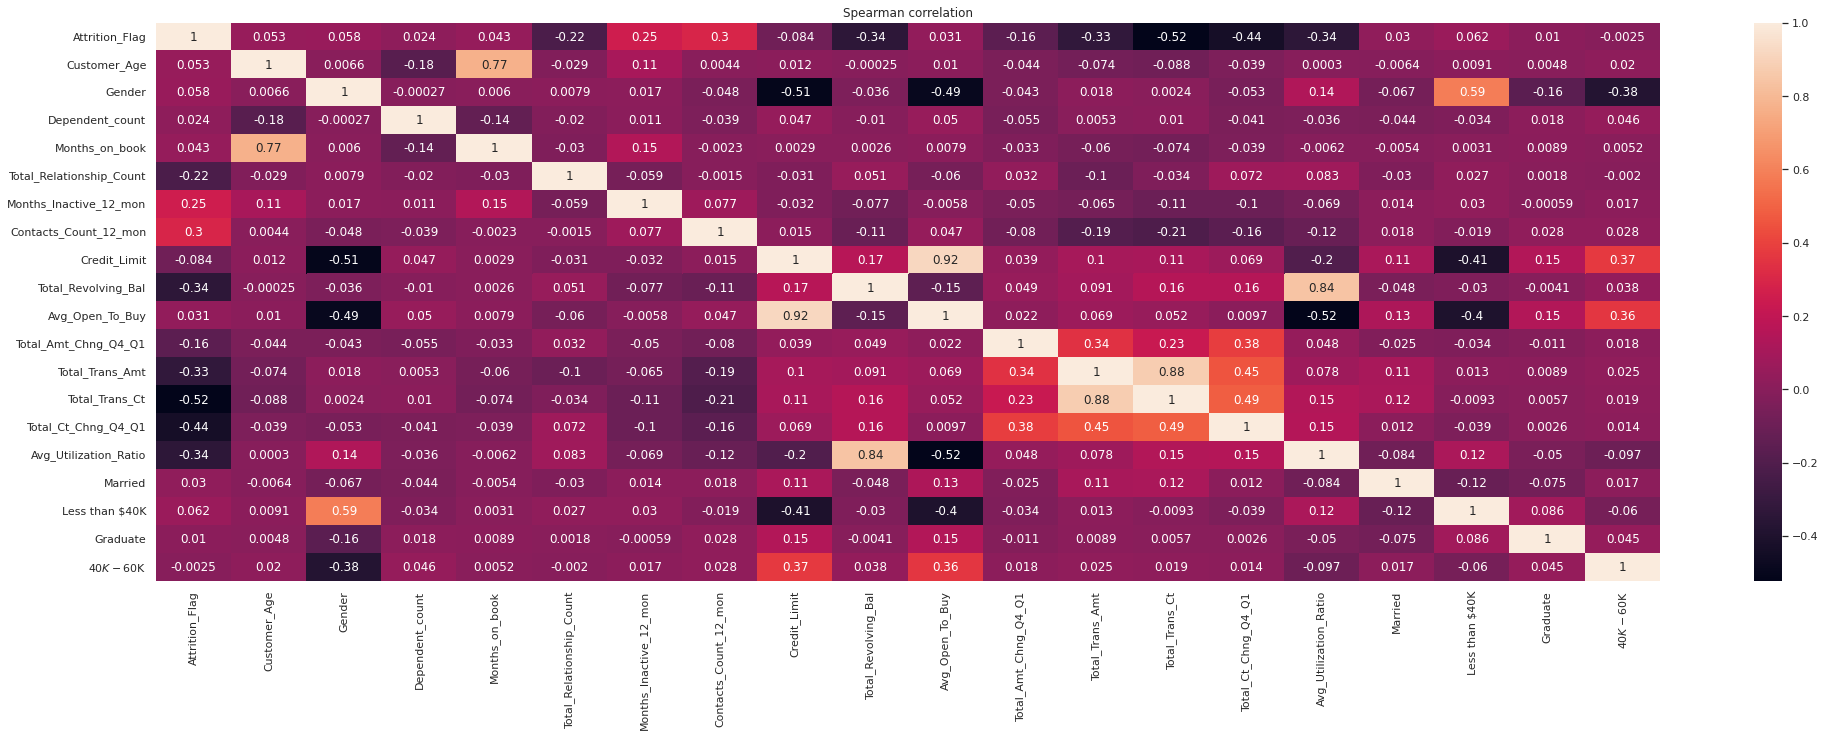

In [ ]:
# Looking at the correlation of our dataset with reduced dimensionality

data_correlation(unsampled_df_with_pcs)

<h1>MODELING</h1>

In [ ]:
# Preparing the testing part

def preparing_testing_data_part(X_test, pca_model_1=None):
  first_part = X_test[X_test.columns[:16]]
  second_part = X_test[X_test.columns[16:]]

  pca_model_2, pca_matrix_2 = pca_to_data(data=second_part,
                                          pre_trained_model=pca_model_1)
  X_test_pca = concat_dataframes(first_part, pca_matrix_2)

  X_test = X_test_pca[X_test_pca.columns[1:]]
  y_test = X_test_pca[X_test_pca.columns[0]]

  return X_test, y_test

In [ ]:
# Splitting data before fitting

X_train = unsampled_df_with_pcs[unsampled_df_with_pcs.columns[1:]]
y_train = unsampled_df_with_pcs['Attrition_Flag']
X_test, y_test = preparing_testing_data_part(X_test, pca_model_1=pca_model_1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

Original data shape: (3039, 17)
PCA data shape:(3039, 4)
Explained variance ration: [0.20667943 0.14138653 0.12489523 0.08313001]
Total explained variance ration: 55.609119611846424
   Attrition_Flag  Customer_Age  Gender  ...  Less than $40K  Graduate  $40K - $60K
0               0            48       1  ...        0.643206 -0.453455     0.233082
1               0            59       0  ...        0.643206 -0.453455     0.233082

[2 rows x 20 columns]


((11914, 19), (11914,), (3039, 19), (3039,))

<h3><b>Cross-Validation</b></h3>

In [ ]:
# Making pipeline for different classification models
# (with and without normalization)

pipe_model_RandomForest_scaled = Pipeline( verbose=True, steps=[
    ('scaler', StandardScaler()),
    ("rf", RandomForestClassifier(random_state=42)) ])
pipe_model_RandomForest = Pipeline( verbose=True, steps=[
    ("rf", RandomForestClassifier(random_state=42)) ])

pip_model_AdaBoost_scaled = Pipeline( verbose=True, steps=[
    ('scaler', StandardScaler()),
    ("ab", AdaBoostClassifier(random_state=42)) ])
pip_model_AdaBoost = Pipeline( verbose=True, steps=[
    ("ab", AdaBoostClassifier(random_state=42)) ])

pip_model_SVC_scaled = Pipeline( verbose=True, steps=[
    ('scaler', StandardScaler()),
    ("ab", SVC(random_state=42)) ])

In [ ]:
# Defining function for F1 score

def find_f1_score(pipeline_list):
  CV = 7
  f1_result = []
  for i in pipeline_list:
    temp = cross_val_score(i[1], X_train, y_train, cv=CV, scoring='f1')
    print(f"F1 for {i[0]}: {temp}")
    print(f"F1 avr: {statistics.mean(temp)}")
    f1_result.append((i[0], temp))
    ax = plt.plot(list(range(1, CV+1)), temp)
    plt.title(i[0])
    plt.show()

  return f1_result

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing rf, total=   2.4s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing rf, total=   2.3s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing rf, total=   2.3s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing rf, total=   2.3s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing rf, total=   2.2s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing rf, total=   2.2s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing rf, total=   2.2s
F1 for

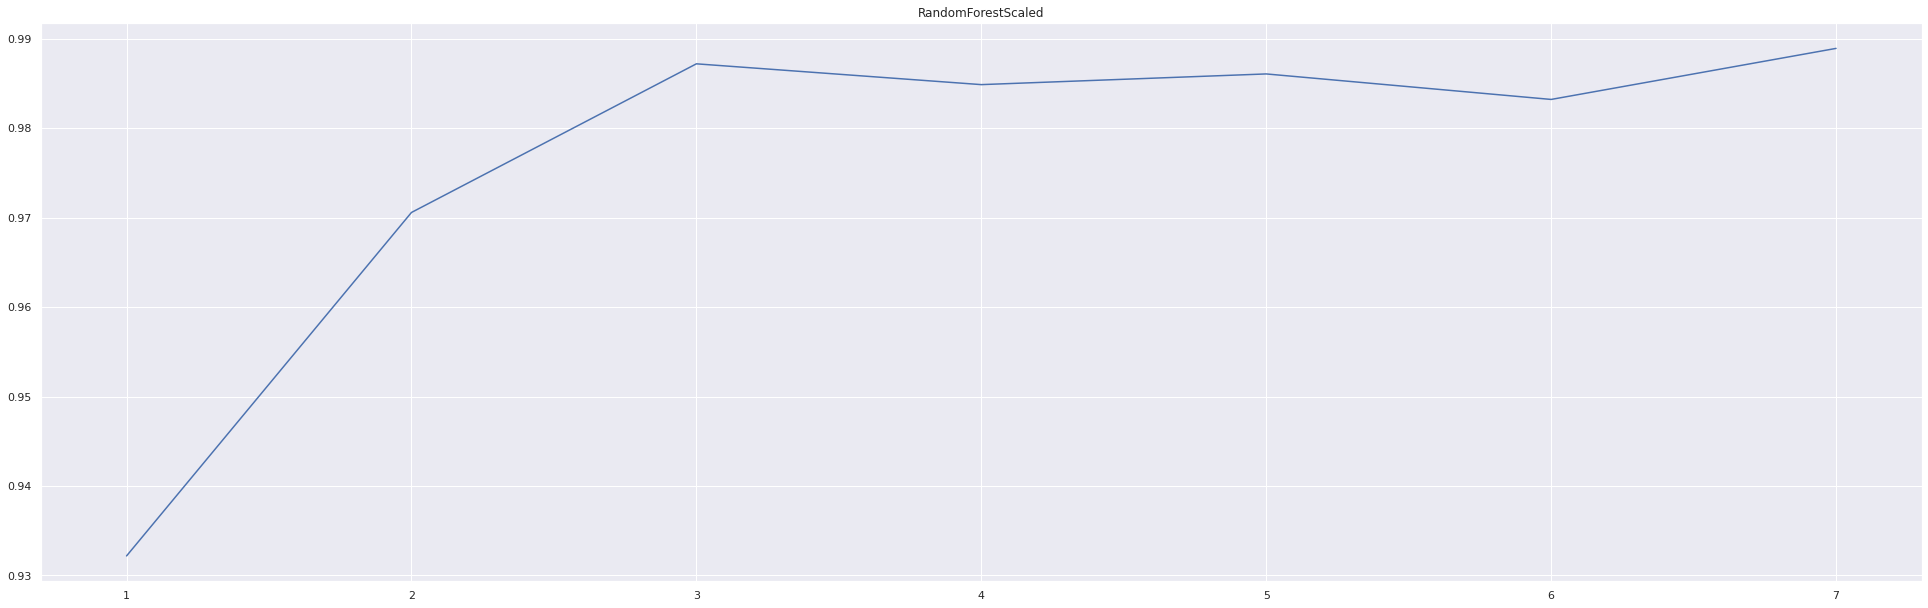

[Pipeline] ................ (step 1 of 1) Processing rf, total=   2.4s
[Pipeline] ................ (step 1 of 1) Processing rf, total=   2.2s
[Pipeline] ................ (step 1 of 1) Processing rf, total=   2.2s
[Pipeline] ................ (step 1 of 1) Processing rf, total=   2.2s
[Pipeline] ................ (step 1 of 1) Processing rf, total=   2.3s
[Pipeline] ................ (step 1 of 1) Processing rf, total=   2.2s
[Pipeline] ................ (step 1 of 1) Processing rf, total=   2.2s
F1 for RandomForest: [0.93218249 0.97058824 0.9872093  0.98488372 0.98550725 0.9832273
 0.98893419]
F1 avr: 0.9760760688902963


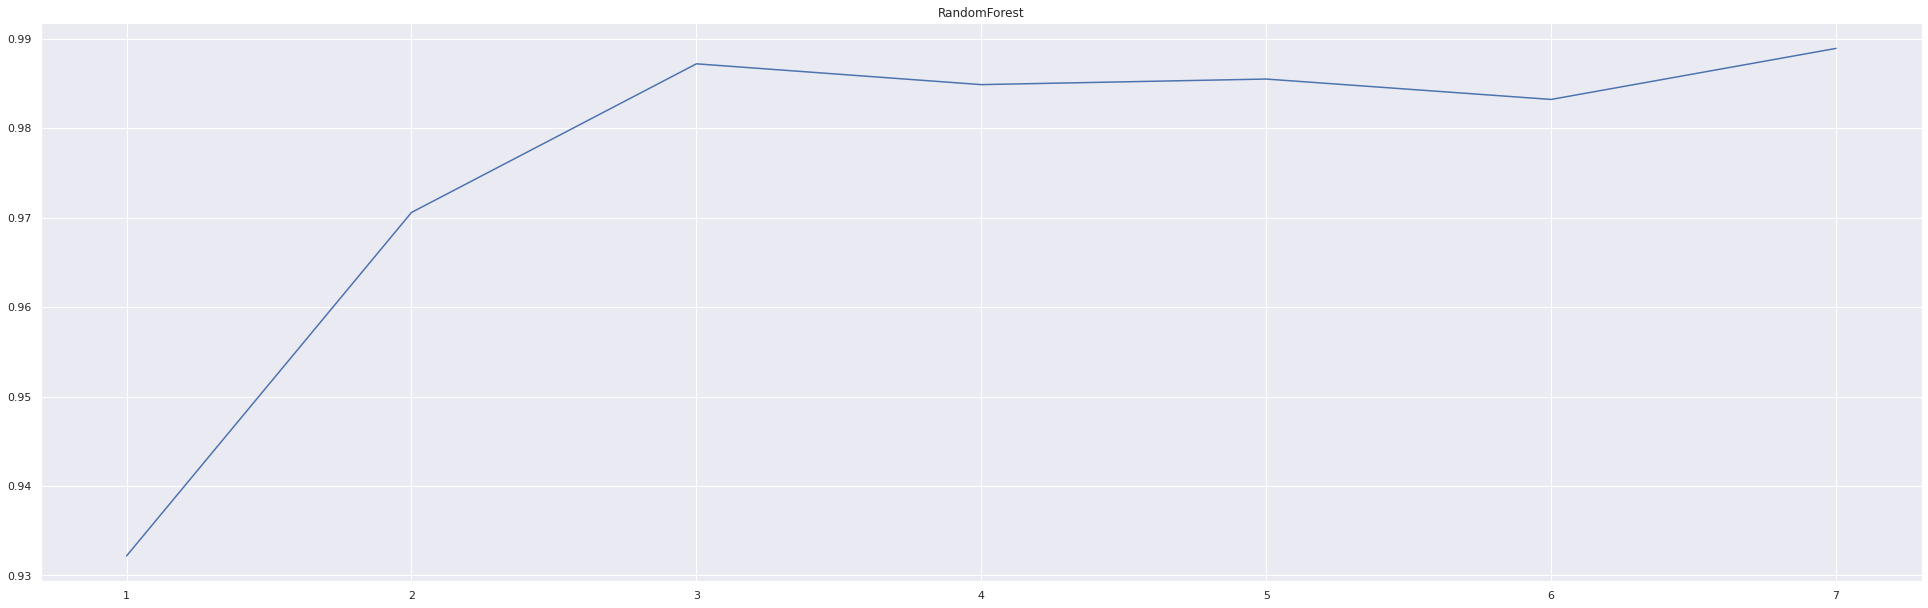

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   1.1s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   1.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   1.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   1.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   1.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   1.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   1.0s
F1 for

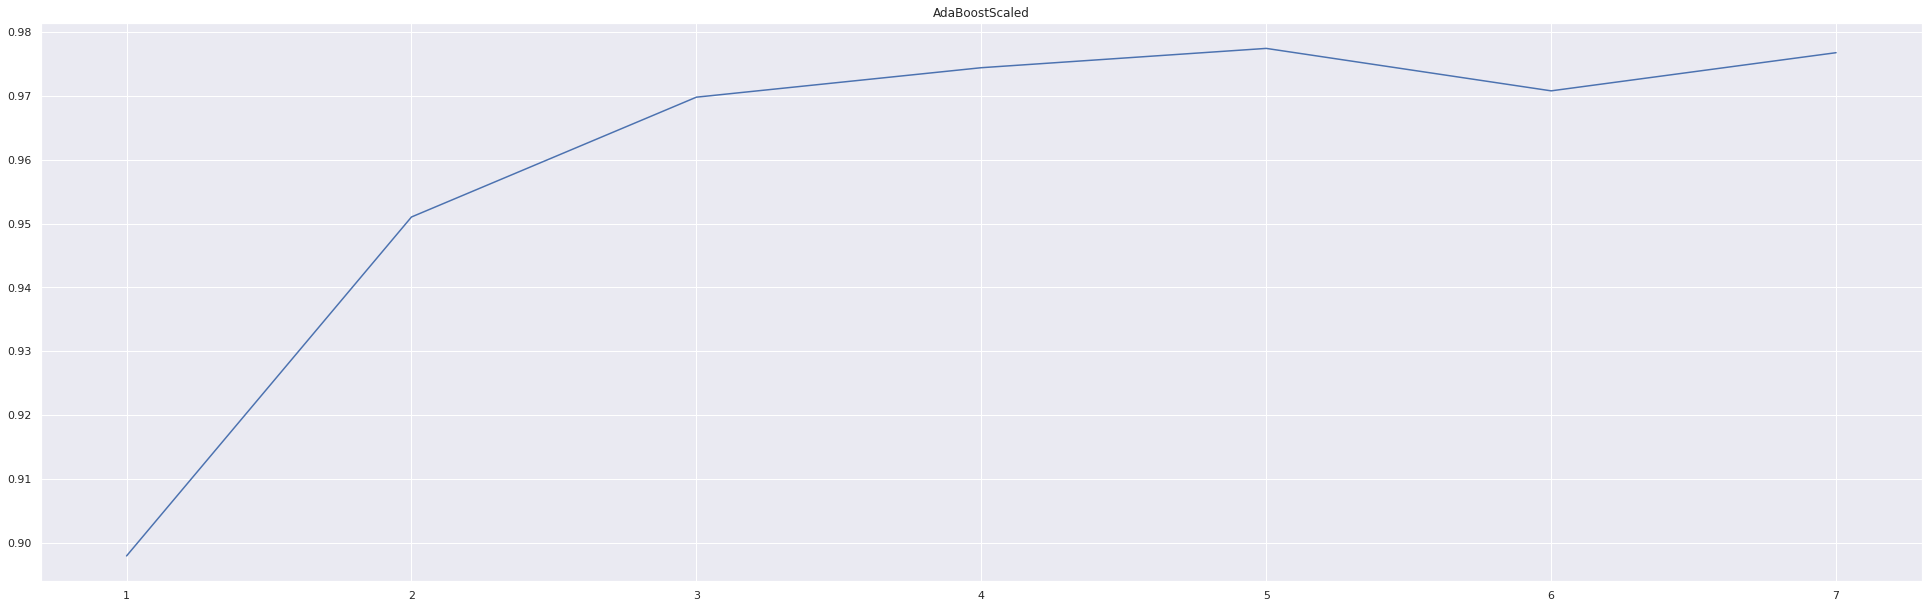

[Pipeline] ................ (step 1 of 1) Processing ab, total=   1.0s
[Pipeline] ................ (step 1 of 1) Processing ab, total=   1.0s
[Pipeline] ................ (step 1 of 1) Processing ab, total=   1.0s
[Pipeline] ................ (step 1 of 1) Processing ab, total=   1.0s
[Pipeline] ................ (step 1 of 1) Processing ab, total=   1.0s
[Pipeline] ................ (step 1 of 1) Processing ab, total=   1.0s
[Pipeline] ................ (step 1 of 1) Processing ab, total=   1.0s
F1 for AdaBoost: [0.89793363 0.95103245 0.96980256 0.9744186  0.97744361 0.97079439
 0.9767712 ]
F1 avr: 0.9597423473677668


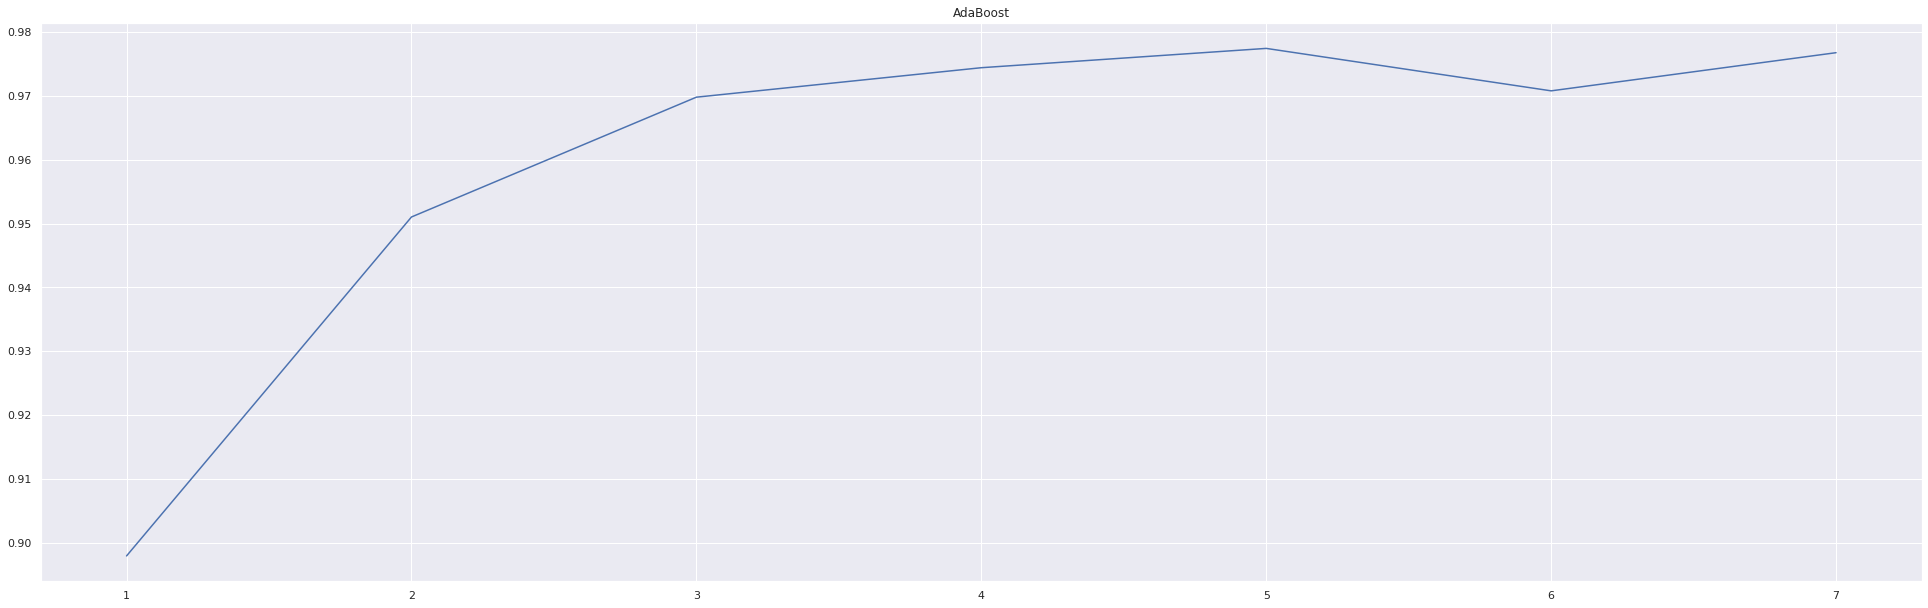

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   1.8s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   1.8s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   1.9s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   1.9s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   1.8s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   1.8s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   1.9s
F1 for

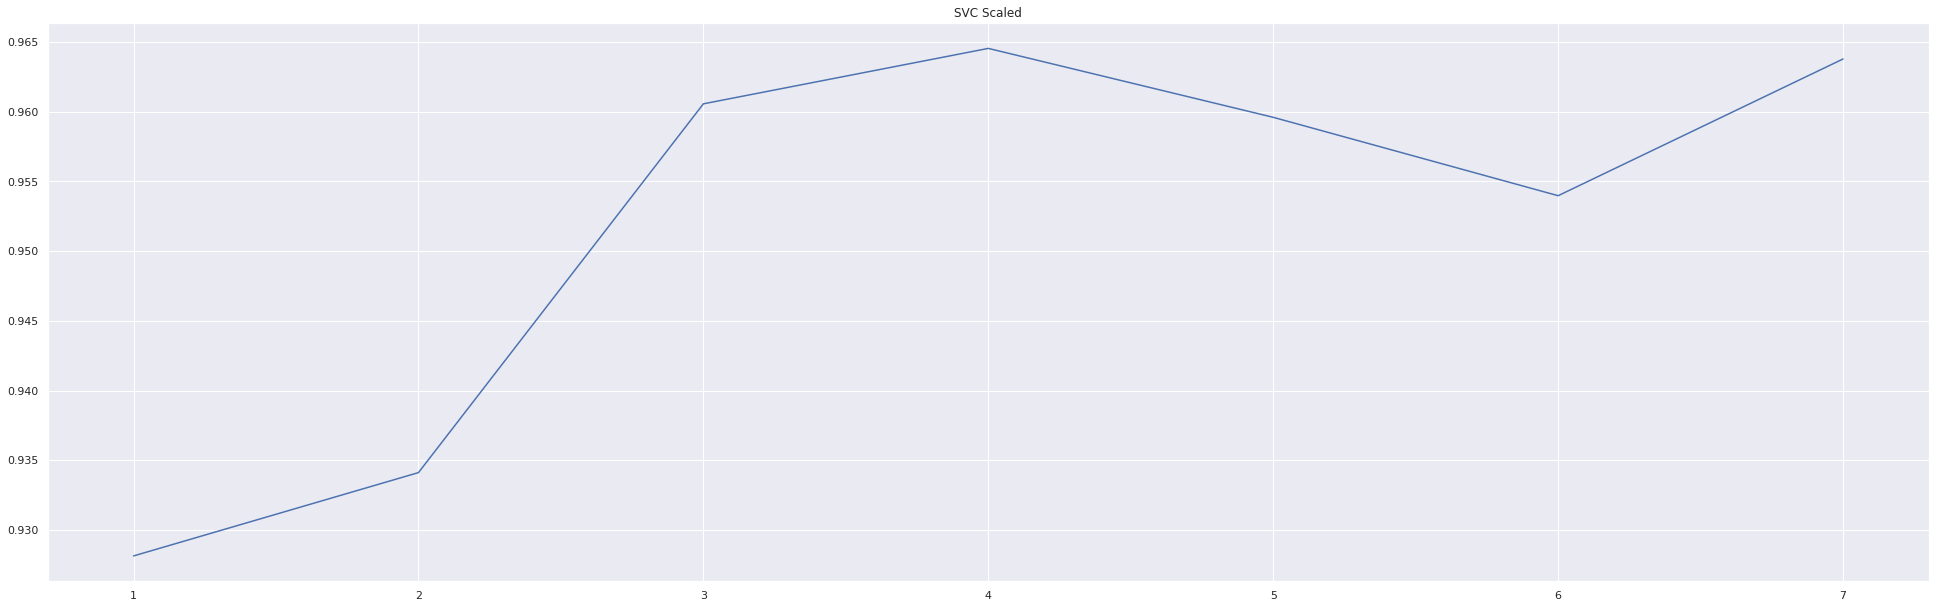

In [ ]:
# Making pipeline list

pipeline_list = [("RandomForestScaled" ,pipe_model_RandomForest_scaled), 
                 ("RandomForest", pipe_model_RandomForest), 
                 ("AdaBoostScaled", pip_model_AdaBoost_scaled),
                 ("AdaBoost", pip_model_AdaBoost),
                 ("SVC Scaled", pip_model_SVC_scaled)]

f1_results = find_f1_score(pipeline_list)

<h1>MODEL-EVALUATION</h1>

In [ ]:
# Model evaluation

for i in pipeline_list:
  i[1].fit(X_train, y_train)
  y_prediction = i[1].predict(X_test)
  print(f"{i[0]}:",round(f1(y_prediction, y_test), 3))

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing rf, total=   2.7s
RandomForestScaled: 0.865
[Pipeline] ................ (step 1 of 1) Processing rf, total=   2.7s
RandomForest: 0.865
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   1.2s
AdaBoostScaled: 0.845
[Pipeline] ................ (step 1 of 1) Processing ab, total=   1.1s
AdaBoost: 0.845
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   2.4s
SVC Scaled: 0.803


<h1>HYPERTUNNING</h1>

In [ ]:
# We will be hyper-tunning RandomForest because its estimation 
# outerformes other classification models. Also, there is a beneficial part to
# train this model in parallel

model_rfc_final = RandomForestClassifier()
model_rfc_final.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Parameters for tunning

n_estimators = [x for x in range(90, 120, 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [x for x in range(10, 50, 10)] + [None]
min_samples_split = [x for x in range(2, 4)]
min_samples_leaf = [x for x in range(1, 3)]
bootstrap = ["True", "False"]

In [ ]:
# Making a random grid for Random Search Grid

rand_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap
}

In [ ]:
# Applying Random Search Grid

model_rfc_final_RandomizedSearch = RandomizedSearchCV(estimator=model_rfc_final,
      param_distributions=rand_grid, n_iter=200, cv=7, verbose=2, n_jobs=-1,
      random_state=42)

In [ ]:
# Fitting (Randomized Search) model

model_rfc_final_RandomizedSearch.fit(X_train, y_train)

Fitting 7 folds for each of 200 candidates, totalling 1400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 1400 out of 1400 | elapsed: 44.6min finished


RandomizedSearchCV(cv=7, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
# Looking at best (Randomized Search) estimator

print(f"BEST SCORE: ", model_rfc_final_RandomizedSearch.best_score_)
print(f"BEST PARAMS: ", model_rfc_final_RandomizedSearch.best_params_)
print(f"BEST INDEX: ", model_rfc_final_RandomizedSearch.best_index_)
print(f"BEST ESTIMATOR: ", model_rfc_final_RandomizedSearch.best_estimator_)

BEST SCORE:  0.9790162833641095
BEST PARAMS:  {'n_estimators': 90, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': 'True'}
BEST INDEX:  60
BEST ESTIMATOR:  RandomForestClassifier(bootstrap='True', ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


<h1>EVALUATING RANDOM SEARCH GRID</h1>

In [ ]:
# Making the test by comparing the tuned model to based one (out of the box)

model_baseLine = RandomForestClassifier(random_state=42)
model_tuned = RandomForestClassifier(bootstrap='True', ccp_alpha=0.0,
              class_weight=None, criterion='gini', max_depth=20,
              max_features='log2', max_leaf_nodes=None, max_samples=None,
              min_impurity_decrease=0.0, min_samples_leaf=1,
              min_weight_fraction_leaf=0.0, n_estimators=90,
              n_jobs=-1, oob_score=False, random_state=42,
              verbose=0, warm_start=False)

In [ ]:
# Fitting both models and getting predictions

model_baseLine.fit(X_train, y_train)
model_tuned.fit(X_train, y_train)

y_pred_1 = model_baseLine.predict(X_test)
y_pred_2 = model_tuned.predict(X_test)

In [ ]:
# Looking at classification report for Based_Model

print(classification_report(y_test, y_pred_1,
                            target_names=["Class 0", "Class 1"]))

              precision    recall  f1-score   support

     Class 0       0.97      0.98      0.97      2543
     Class 1       0.88      0.85      0.87       496

    accuracy                           0.96      3039
   macro avg       0.93      0.91      0.92      3039
weighted avg       0.96      0.96      0.96      3039



In [ ]:
# Looking for classification report for Tuned_Model

print(classification_report(y_test, y_pred_2,
                            target_names=["Class 0", "Class 1"]))

              precision    recall  f1-score   support

     Class 0       0.97      0.98      0.97      2543
     Class 1       0.88      0.85      0.86       496

    accuracy                           0.96      3039
   macro avg       0.93      0.91      0.92      3039
weighted avg       0.96      0.96      0.96      3039



[[2488   55]
 [  76  420]] 



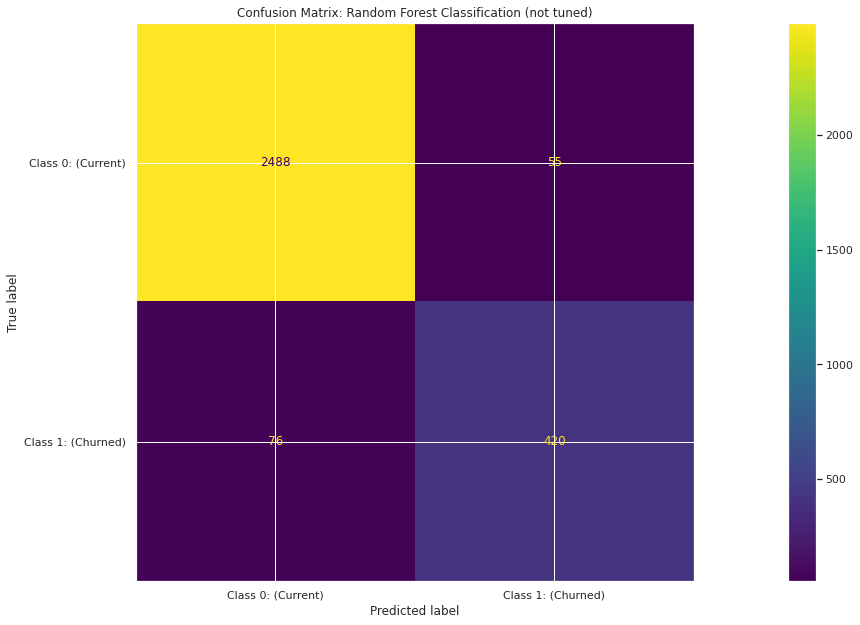

In [ ]:
# Visualizing the confusion matrix for Based_Model

print(confusion_matrix(y_test, y_pred_1), "\n")
plot_confusion_matrix(model_baseLine, X_test, y_test, values_format='d',
                      display_labels=["Class 0: (Current)",
                                      "Class 1: (Churned)"])
plt.title("Confusion Matrix: Random Forest Classification (not tuned)")
plt.show()

[[2485   58]
 [  74  422]] 



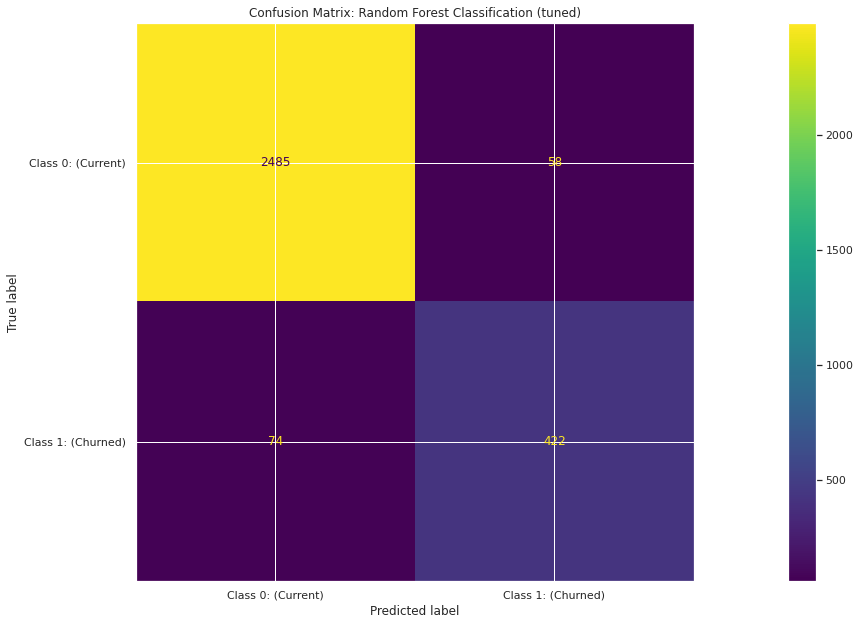

In [ ]:
# Visualizing the confusion matrix for Tuned_Model

print(confusion_matrix(y_test, y_pred_2), "\n")
plot_confusion_matrix(model_tuned, X_test, y_test, values_format='d',
                      display_labels=["Class 0: (Current)",
                                      "Class 1: (Churned)"])
plt.title("Confusion Matrix: Random Forest Classification (tuned)")
plt.show()

In [ ]:
# Function to make ROC/AUC curve graph

def roc_auc_curve_graph(y_pred, classifer_name):
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
  roc_auc = metrics.auc(fpr, tpr)
  display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                    estimator_name=classifer_name)
  display.plot()
  plt.title(f'ROC and AUC curve - {classifer_name}')
  plt.show()

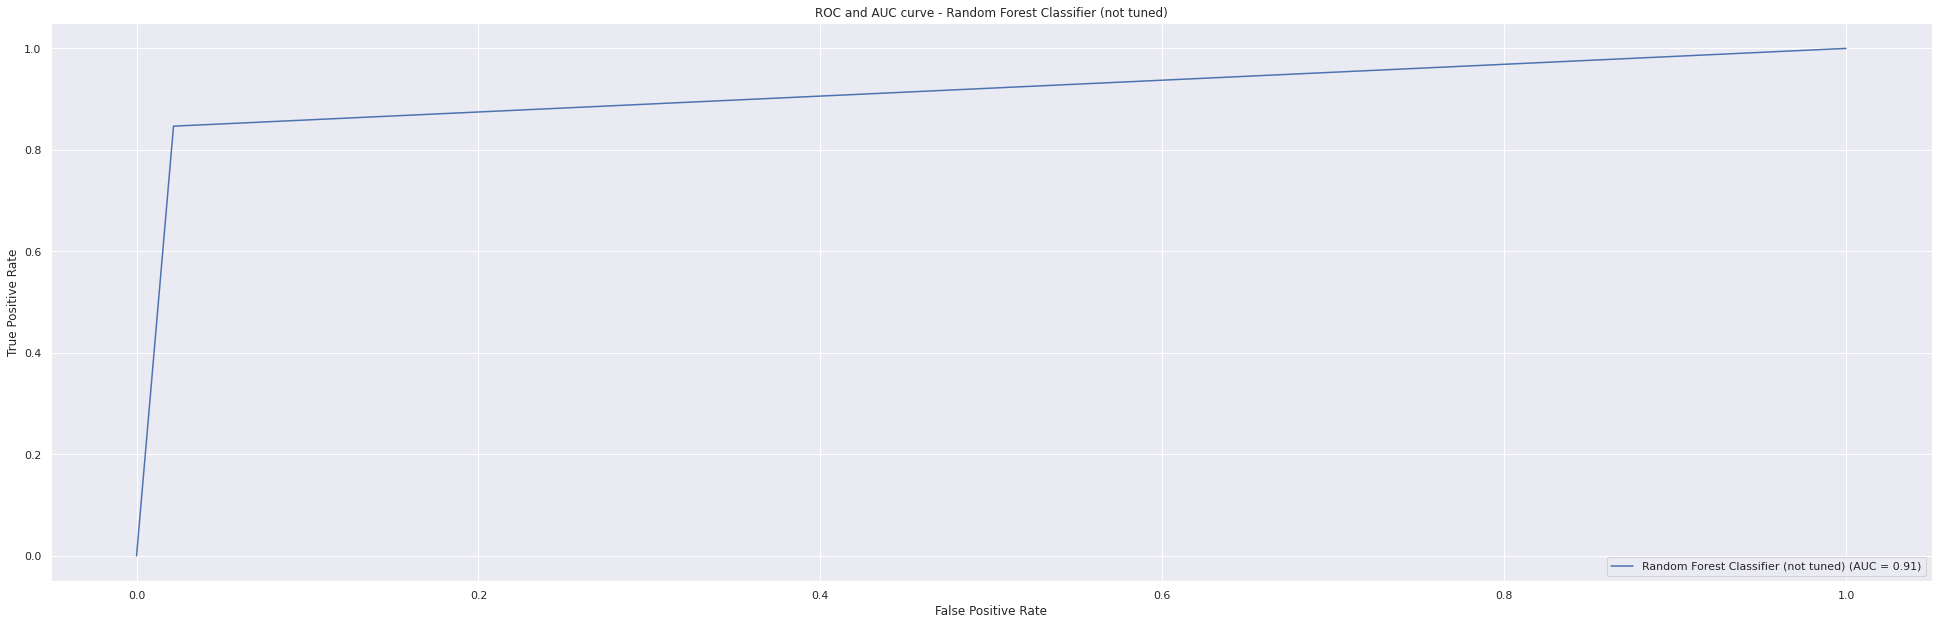

In [ ]:
# Show ROC/AUC curve for Based_Model (Random Forest Classifier)

roc_auc_curve_graph(y_pred_1, 'Random Forest Classifier (not tuned)')

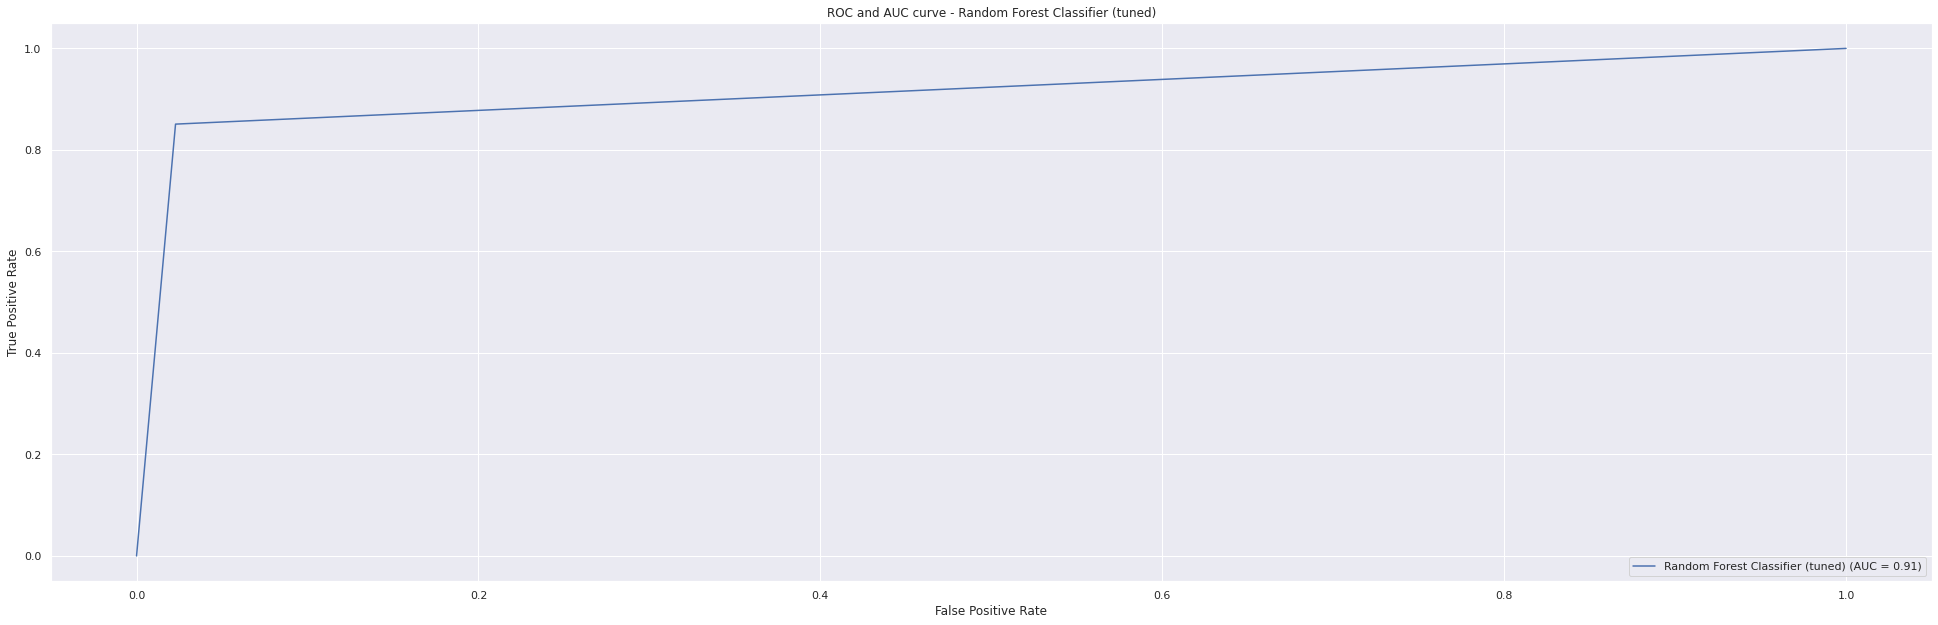

In [ ]:
# Show ROC/AUC curve for Tuned_Model (Random Forest Classifier)

roc_auc_curve_graph(y_pred_2, 'Random Forest Classifier (tuned)')

In [ ]:
# Defining function to show Precision-Recall curve

def show_prec_recall_curve(y_test, y_pred, estimator, estimator_name):
  avr_prec_score = average_precision_score(y_test, y_pred)
  prec, recall, _ = precision_recall_curve(y_test, y_pred,
                                          pos_label=estimator.classes_[1])
  pr_display = PrecisionRecallDisplay(precision=prec, recall=recall,
                                      average_precision=avr_prec_score,
                                      estimator_name=estimator_name).plot()

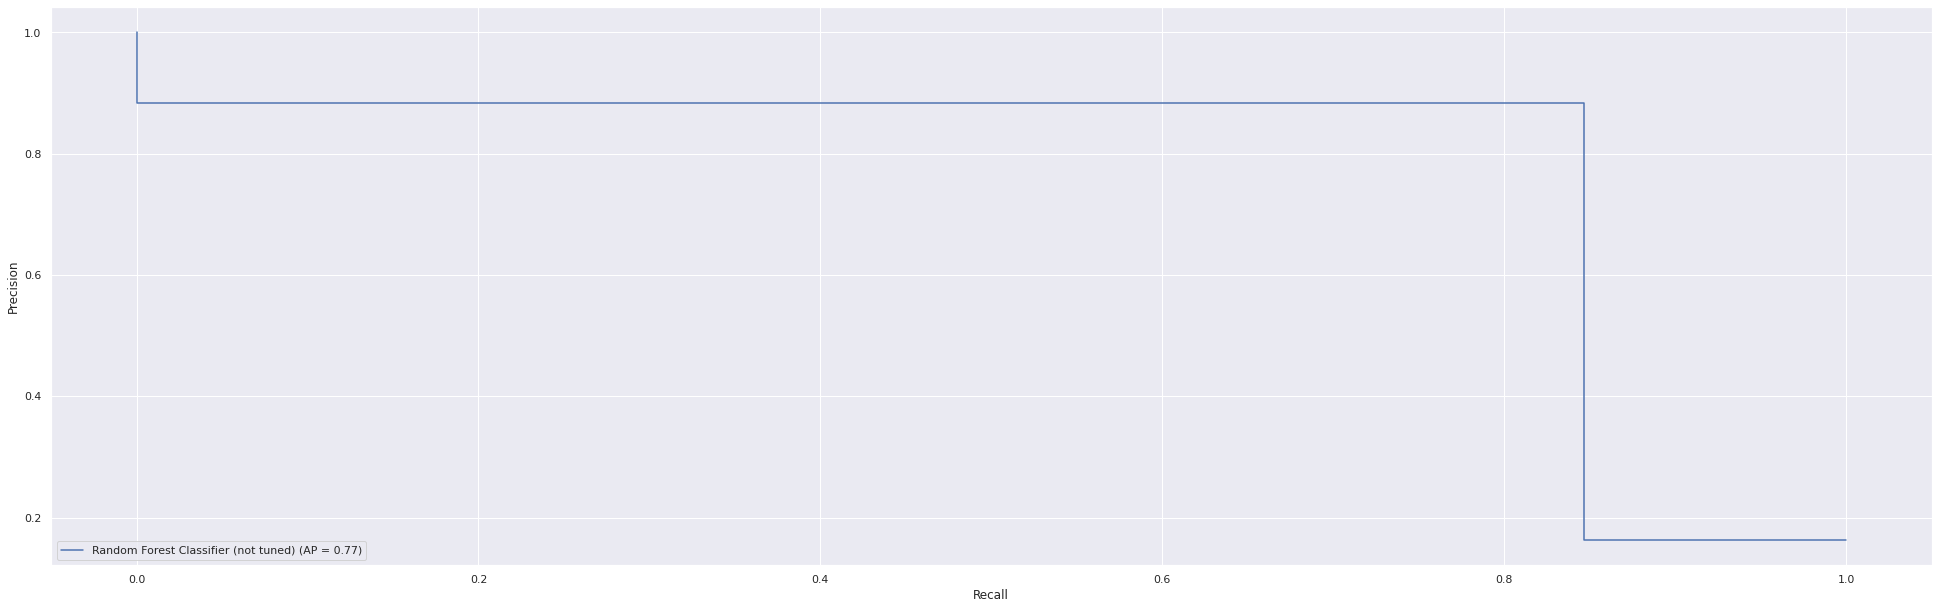

In [ ]:
# Show Precision-Recall curve for Based_Model

show_prec_recall_curve(y_test, y_pred_1, model_baseLine,
                       'Random Forest Classifier (not tuned)')

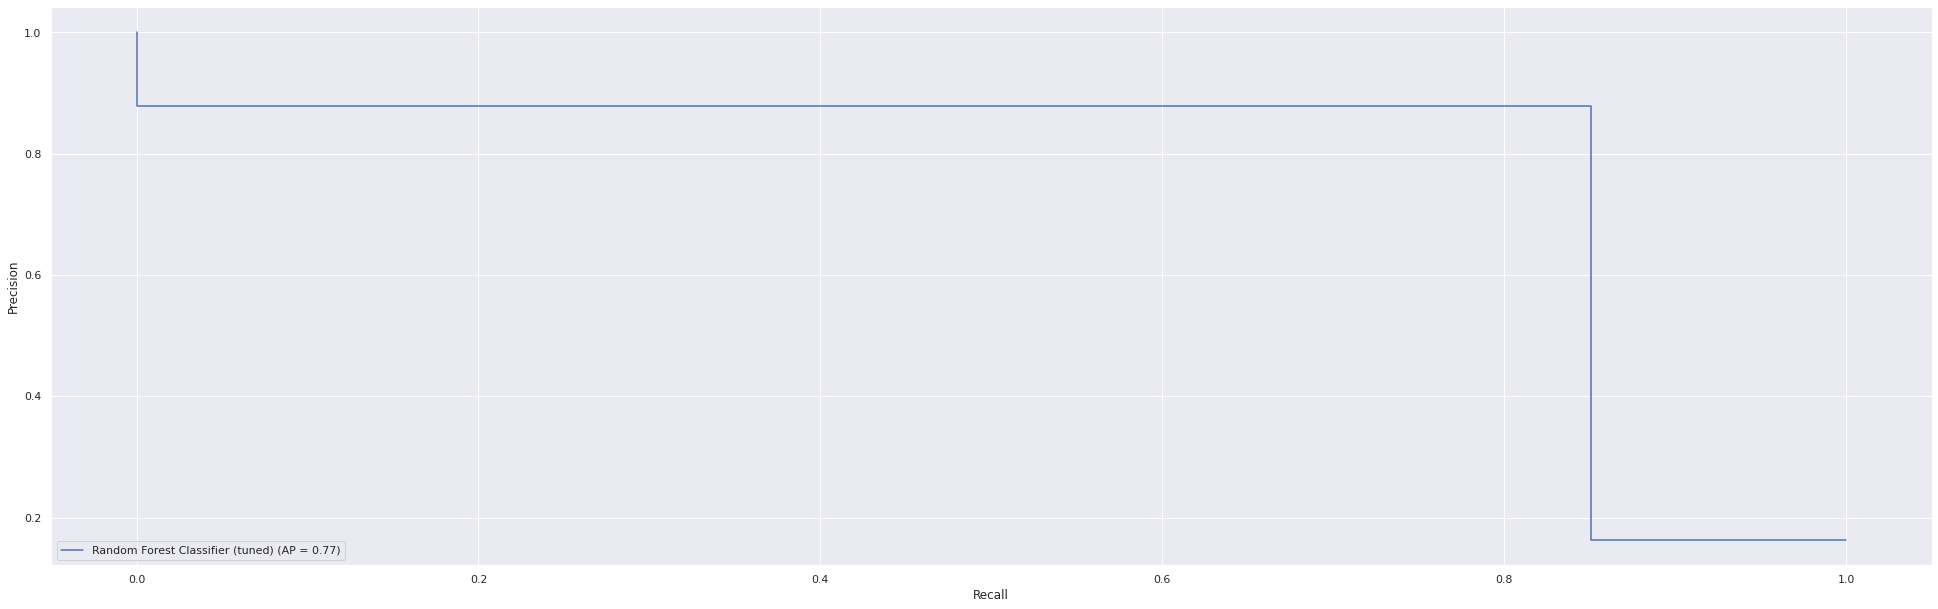

In [ ]:
# Show Precision-Recall curve for Tuned_Model

show_prec_recall_curve(y_test, y_pred_2, model_tuned,
                       'Random Forest Classifier (tuned)')

<h1>TRAING FINAL MODEL ON WHOLE DATASET</h1>

In [ ]:
# Our Based_Model outperformed the Tuned_Model. So, we will be fitting the whole
# dataset to our final model;
# First thing we need to do with our data is upsampling using SMOTE approach

X, y = oversampling_data(df)
X.shape, y.shape

Independent feature(s): (17000, 32)
 Dependent feature: (17000,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


((17000, 32), (17000,))

In [ ]:
# Function to check if our classes are balanced out

def check_balance_of_classes(X, y):
  X_df = pd.DataFrame(X, columns=df.columns[1:])
  y_df = pd.DataFrame(y, columns=['Attrition_Flag'])
  X_y_df = pd.concat([y_df, X_df], axis=1)
  print(f"The number of unique values in each class:\n",
        y_df['Attrition_Flag'].value_counts())
  return X_df, y_df, X_y_df

X_df, y_df, X_y_df = check_balance_of_classes(X, y)

The number of unique values in each class:
 1    8500
0    8500
Name: Attrition_Flag, dtype: int64


In [ ]:
# Applying PCA dimensionality reduction technique for dummies features

def using_pca(X_y_df):
  ohe_data_2 = X_y_df[X_y_df.columns[16:]]
  rest_data = X_y_df[X_y_df.columns[:16]]

  # Applying PCA with 4 principal components on dummy features
  pca_model_2, pca_matrix_2 = pca_to_data(data=ohe_data_2)

  # Concatanating PCA matrix (result) with our dataset
  df_final = pd.concat([rest_data, pca_matrix_2], axis=1)

  return df_final

In [ ]:
# Applying PCA to our dataset

df_final = using_pca(X_y_df)

Original data shape: (17000, 17)
PCA data shape:(17000, 4)
Explained variance ration: [0.20659274 0.14145156 0.12275015 0.08189864]
Total explained variance ration: 55.26930916099202


In [ ]:
# Creating Random Forest model instance with based parameters

model_final = RandomForestClassifier(random_state=42)
model_final.fit(df_final[df_final.columns[1:]], df_final[df_final.columns[0]])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

<h1>TESTING OUR MODEL</h1>

In [ ]:
# Loading testing dataset

copied_path = "/content/drive/MyDrive/Projects/Project_1/data/testing/BankChurners.csv"
df_test = pd.read_csv(copied_path)

In [ ]:
# Converting some columns to proper data type, so we are able to fit it to our
# estimator

df_test['Attrition_Flag'] = df_test['Attrition_Flag'].map(
    lambda x:1 if x == "Attrited Customer" else 0 )

In [ ]:
df_test['Gender'] = df_test['Gender'].map(lambda x: 1 if x == "F" else 0)

In [ ]:
# Function to create dummies for our dataset

def create_dummies_for(df, list_of_columns):
  for i in list_of_columns:
    if len(df[i].unique()) <= 1:
      df = df.drop(columns=[i])
      continue
    try:
      df = pd.concat([df, pd.get_dummies(
          df[i]).drop(['Unknown'], axis=1)], axis=1)
    except:
      df = pd.concat([df, pd.get_dummies(
          df[i], drop_first=True)], axis=1)
      
  return df

In [ ]:
# Applying function that creates dummies to our dataset

col_names = ['Education_Level', 'Income_Category', 'Marital_Status',
             'Card_Category']
df_test = create_dummies_for(df_test, col_names)

In [ ]:
# Dopping categorical columns (because we already made dummies for them)

df_test = df_test.drop(['Education_Level', 'Income_Category', 'Marital_Status',
              'Card_Category', 'CLIENTNUM', "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
              "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], axis=1)

In [ ]:
# Applying PCA to make sure that the dimension of our final dataset (that will
# be used for prediction) is the same that it was before

df_test_final = using_pca(df_test)

Original data shape: (4, 6)
PCA data shape:(4, 4)
Explained variance ration: [5.38346769e-01 3.38348793e-01 1.23304438e-01 2.82743879e-33]
Total explained variance ration: 99.99999999999997


In [ ]:
# Applying estimation to our testing dataset and looking at results

y_pred_test = model_final.predict(df_test_final[df_test_final.columns[1:]])
print(f"Estimation: ", y_pred_test)

Estimation:  [0 1 0 1]


<h1>SAVING MODEL</h1>

In [ ]:
# Saving model using "joblib", because it works faster

path_to_save = "/content/drive/MyDrive/Projects/Project_1/colab_notebooks/models/model_1/random_forest.joblib"
joblib.dump(model_final, path_to_save)

['/content/drive/MyDrive/Projects/Project_1/colab_notebooks/models/model_1/random_forest.joblib']

<h1>SUMMARY</h1>

<h3>So, during this process, we were able to make the estimator (classification model) that is able to estimate the prediction of customer churn based on provided features. During this project, we were applying a few things to our data: wrangling part (including conversion to different data types, dropping irrelevant columns, normalization), EDA (looking at the distribution of our data and its outliers; also looking if our classes are balanced out and the correlation among features is normal), pre-processing (includes of creating dummies, applying PCA, splitting data), modeling (creating a Grid Search to pick the best estimator, applying hyper-tunning, evaluating, testing, saving).</h3>